In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import seaborn as sns
import ast
import math

In [2]:
df = pd.read_csv('2GIS_final_filtered.csv')
df

,Unnamed: 0,index,address_comment,address_name,point,building_name,Restaurant_name,Brief_description,postcode,Count_branches,...,metro_dist,nearest_bus,bus_dist,is_restaurant,is_cafe,is_coffee_shop,is_bar,is_bakery,is_other,distance_to_center_km
0,0,0,2 этаж,"Страстной бульвар, 8а","{'lat': 55.766402, 'lon': 37.610584}",ТЦ На Страстном,The Бык,демократичный мясной ресторан,107031.0,20,...,164.0,Метро Чеховская,160.0,1,1,0,1,0,0,1.259205
1,1,1,1 этаж,"2-я Останкинская улица, 3","{'lat': 55.826374, 'lon': 37.629548}",Отдельное заведение,The Бык,демократичный мясной ресторан,129515.0,20,...,850.0,Арка Южного входа,295.0,1,0,0,0,0,0,7.891473
2,2,2,1 этаж,"улица Пречистенка, 19/11 ст1","{'lat': 55.741242, 'lon': 37.593171}",Отдельное заведение,Bagebi,ресторан грузинской кухни с зимним садом,119034.0,1,...,710.0,Академия художеств,148.0,1,0,0,0,0,1,2.234354
3,3,3,1 этаж,"улица Солянка, 1/2","{'lat': 55.754456, 'lon': 37.638015}",Отдельное заведение,The Black Swan Pub,NaN,109028.0,1,...,190.0,Метро Китай-город,202.0,1,0,0,0,0,0,1.288494
4,4,4,1 этаж,"Новослободская улица, 16","{'lat': 55.781759, 'lon': 37.599088}",Отдельное заведение,The Бык,демократичный мясной ресторан,127055.0,20,...,23.0,Метро Менделеевская,4.0,1,1,0,0,0,0,3.114394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8219,9723,9977,1 этаж,"Советская улица, 29а","{'lat': 55.943628, 'lon': 37.871596}",Отдельное заведение,Хинкальная,NaN,141069.0,1,...,NaN,NaN,NaN,0,1,0,0,0,0,26.273460
8220,9725,9980,1 этаж,"улица Дзержинского, 1а","{'lat': 55.926891, 'lon': 37.913134}",Отдельное заведение,Coffee vs burger,кофейня,141180.0,1,...,NaN,NaN,NaN,0,1,1,0,0,0,26.561572
8221,9726,9981,1 этаж,"улица Покровка, 40Б","{'lat': 55.761145, 'lon': 37.65249}",Отдельное заведение,Ванька Хлебников,кофейня,101000.0,1,...,870.0,Лялин переулок,109.0,0,0,1,0,0,0,2.267310
8222,9736,9993,3 этаж,"Хорошёвский проезд, 14","{'lat': 55.720632, 'lon': 37.380005}",Vegas,LaserLand,кафе,143025.0,1,...,4400.0,ТРЦ Вегас,239.0,0,0,0,0,0,1,15.431855


# Исследование зависимости рейтинга и кол-ва оценок и отзывов заведения от принадлежности к сети

При рассмотрении возможности открывать собственное заведение надо учитывать две возможности: открывать уникальное заведение или покупать франшизу? В обоих враиантах есть свои плюсы, однако мы рассмотрим с сугубо прагматичной точки зрения - что привлекает большее количество людей и что больше нравится привлечённым. Для этого взглянем на среднюю оценку, количество оценок и количество отзывов заведений.

<ipython-input-3-0ff257842174>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-3-0ff257842174>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-3-0ff257842174>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


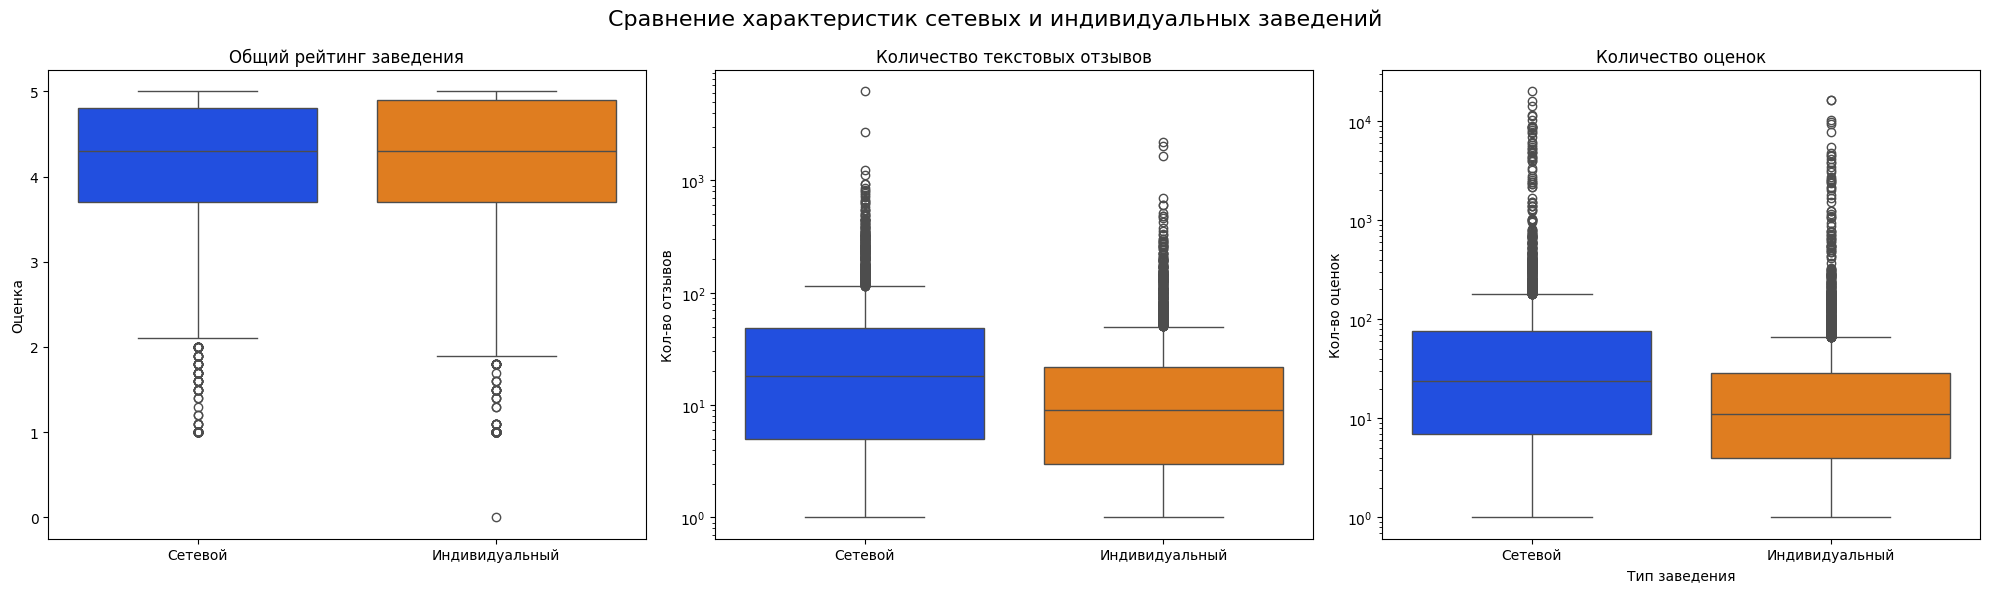

In [3]:
df['is_chain'] = df['Count_branches'].apply(lambda x: 'Сетевой' if x > 1 else 'Индивидуальный')

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# График 1: Общий рейтинг заведения
sns.boxplot(
    ax=axes[0],
    x='is_chain',
    y='general_rating',
    data=df,
    palette='bright'
)
axes[0].set_title('Общий рейтинг заведения')
axes[0].set_xlabel('')
axes[0].set_ylabel('Оценка')

# График 2: Количество текстовых отзывов
sns.boxplot(
    ax=axes[1],
    x='is_chain',
    y='general_review_count',
    data=df,
    palette='bright'
)
axes[1].set_yscale('log')
axes[1].set_title('Количество текстовых отзывов')
axes[1].set_xlabel('')
axes[1].set_ylabel('Кол-во отзывов')

# График 3: Количество оценок
sns.boxplot(
    ax=axes[2],
    x='is_chain',
    y='general_review_count_with_stars',
    data=df,
    palette='bright'
)
axes[2].set_yscale('log')
axes[2].set_title('Количество оценок')
axes[2].set_xlabel('Тип заведения')
axes[2].set_ylabel('Кол-во оценок')

plt.suptitle('Сравнение характеристик сетевых и индивидуальных заведений', fontsize=16)
plt.tight_layout()
plt.show()

Здесь можем сделать следующие выводы:

Рейтинг индивидуальных заведений имеет больший разброс в обе стороны, медианный же рейтинг примерно одинаковый для сетевых и несетевых заведений. Однако разброс в сторону отрицательных значений у индивидуальных заведений значительно больше, чем у сетевых.
Количество текстовых отзывов у сетевых ресторанов выше чем у индивидуальных
С количеством оценок ситуация аналогичная - сетевые рестораны получают гораздо больше оценок. Их медианное значение находится практически на одном уровне с третьим квартилем индивидуальных заведений.
Эти факты можно интерпретировать по-разному, однако вывод остаётся одним - люди предпочитают сетевые рестораны индивидуальным.

# Исследование зависимости рейтинга заведения от времени его работы

Также немаловажным фактором является график работы. В частности стоит вопрос - имеет ли смысл включать в свою работу вечерние или ночные часы? Его и изучим. Примем ночные часы за период с 23:00 до 4:00 и рассмотрим зависимость рейтинга заведения от его часов работы.

<ipython-input-4-7a59931226d2>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='night_operation', y='general_rating', data=grouped, palette='bright', ax=axes[i])
<ipython-input-4-7a59931226d2>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='night_operation', y='general_rating', data=grouped, palette='bright', ax=axes[i])
<ipython-input-4-7a59931226d2>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='night_operation', y='general_rating', data=grouped, palette='bright', ax=axes[i])
<ipython-input-4-7a59931226d2>:72: FutureWarning:

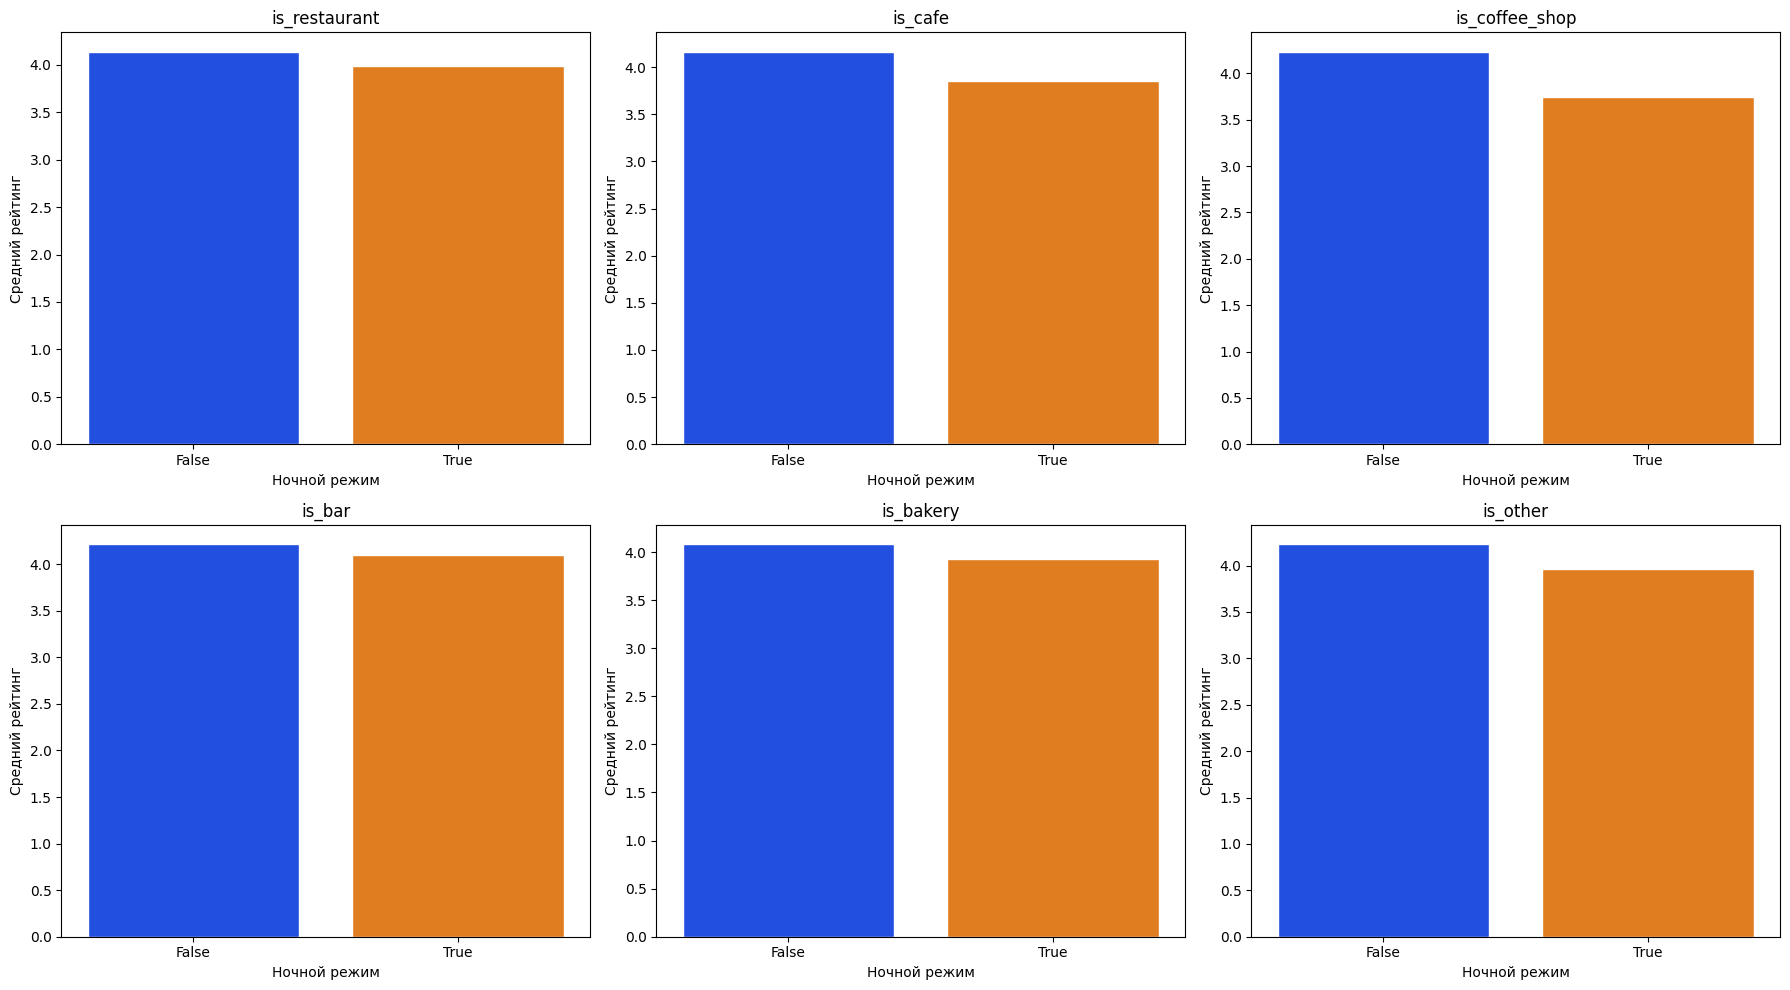

In [4]:
# Функция для преобразования строки времени в минуты от начала дня
def time_str_to_minutes(t):
    if t == "24:00":
        return 1440
    try:
        h, m = map(int, t.split(":"))
        return h * 60 + m
    except Exception:
        return None

# Функция для проверки, включает ли рабочее время ночной интервал (с 19:00 до 04:00)
def interval_includes_night(working_hours_str):
    if pd.isna(working_hours_str):
        return False

    # Ночные интервалы: [23:00, 24:00) и [0:00, 04:00)
    night_intervals = [(23 * 60, 24 * 60), (0, 4 * 60)]
    intervals = working_hours_str.split(',')

    for interval in intervals:
        interval = interval.strip()
        if '–' not in interval:
            continue
        start_str, end_str = interval.split('–')
        start_str = start_str.strip()
        end_str = end_str.strip()

        start_min = time_str_to_minutes(start_str)
        end_min = time_str_to_minutes(end_str)
        if start_min is None or end_min is None:
            continue

        if start_min < end_min:
            # Если интервал не переходит через полночь
            for n_start, n_end in night_intervals:
                if max(start_min, n_start) < min(end_min, n_end):
                    return True
        else:
            # Интервал переходит через полночь, разбиваем его на два сегмента
            for n_start, n_end in night_intervals:
                if max(start_min, n_start) < min(1440, n_end):
                    return True
            for n_start, n_end in night_intervals:
                if max(0, n_start) < min(end_min, n_end):
                    return True
    return False

# Предполагается, что DataFrame df уже загружен и содержит:
# - Столбец working_hours с информацией о графике работы заведения.
# - Столбец general_rating с рейтингом заведения.
# - Столбцы с типами заведения: is_restaurant, is_cafe, is_coffee_shop, is_bar, is_bakery, is_other.

# Вычисляем признак ночного режима работы для каждого заведения
df['night_operation'] = df['working_hours'].apply(interval_includes_night)

# Список столбцов с типами заведений (one-hot кодировка)
types = ['is_restaurant', 'is_cafe', 'is_coffee_shop', 'is_bar', 'is_bakery', 'is_other']

# Создаем subplots: 2 строки по 3 графика (всего 6)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()  # Преобразуем массив осей в одномерный список для удобства итерации
sns.set_style("whitegrid")

for i, type_col in enumerate(types):
    # Отбираем заведения, у которых столбец с данным типом равен 1
    df_type = df[df[type_col] == 1]

    # Группируем по ночному режиму работы и вычисляем среднее значение рейтинга
    grouped = df_type.groupby('night_operation')['general_rating'].mean().reset_index()

    # Строим столбчатую диаграмму на соответствующем subplot
    sns.barplot(x='night_operation', y='general_rating', data=grouped, palette='bright', ax=axes[i])
    axes[i].set_title(type_col)
    axes[i].set_xlabel("Ночной режим")
    axes[i].set_ylabel("Средний рейтинг")

plt.tight_layout()
plt.show()

И здесь мы получаем неожиданный результат. Во всех категориях заведений рейтинг выше, если ночные часы работы не включены. Значит ли это что за ними плохо следят или ночами там собирается нежелательный контингент - сказать не можем, однако делаем вывод что не имеет смысла включать ночное время в свой режим работы.

# Исследование зависимости рейтинга и подаваемой кухни

Наверное самый важный вопрос при открытии заведения общественного питания (или общественного выпивания) - какую кухню подавать? Будем ли мы рестораном фастфуда, лёгкой японской пищи или сытной сибирской? Может быть узкоспециализированной: вегетерианской, халяльной или кошерной? Исследуем зависимость рейтинга заведения от его подаваемой кухни двумя способами - с разбивкой на все возможные кухни или же крупные группы.

<ipython-input-5-098048a01ce6>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Cuisine_list', y='avg_rating', data=cuisine_stats, palette='viridis')


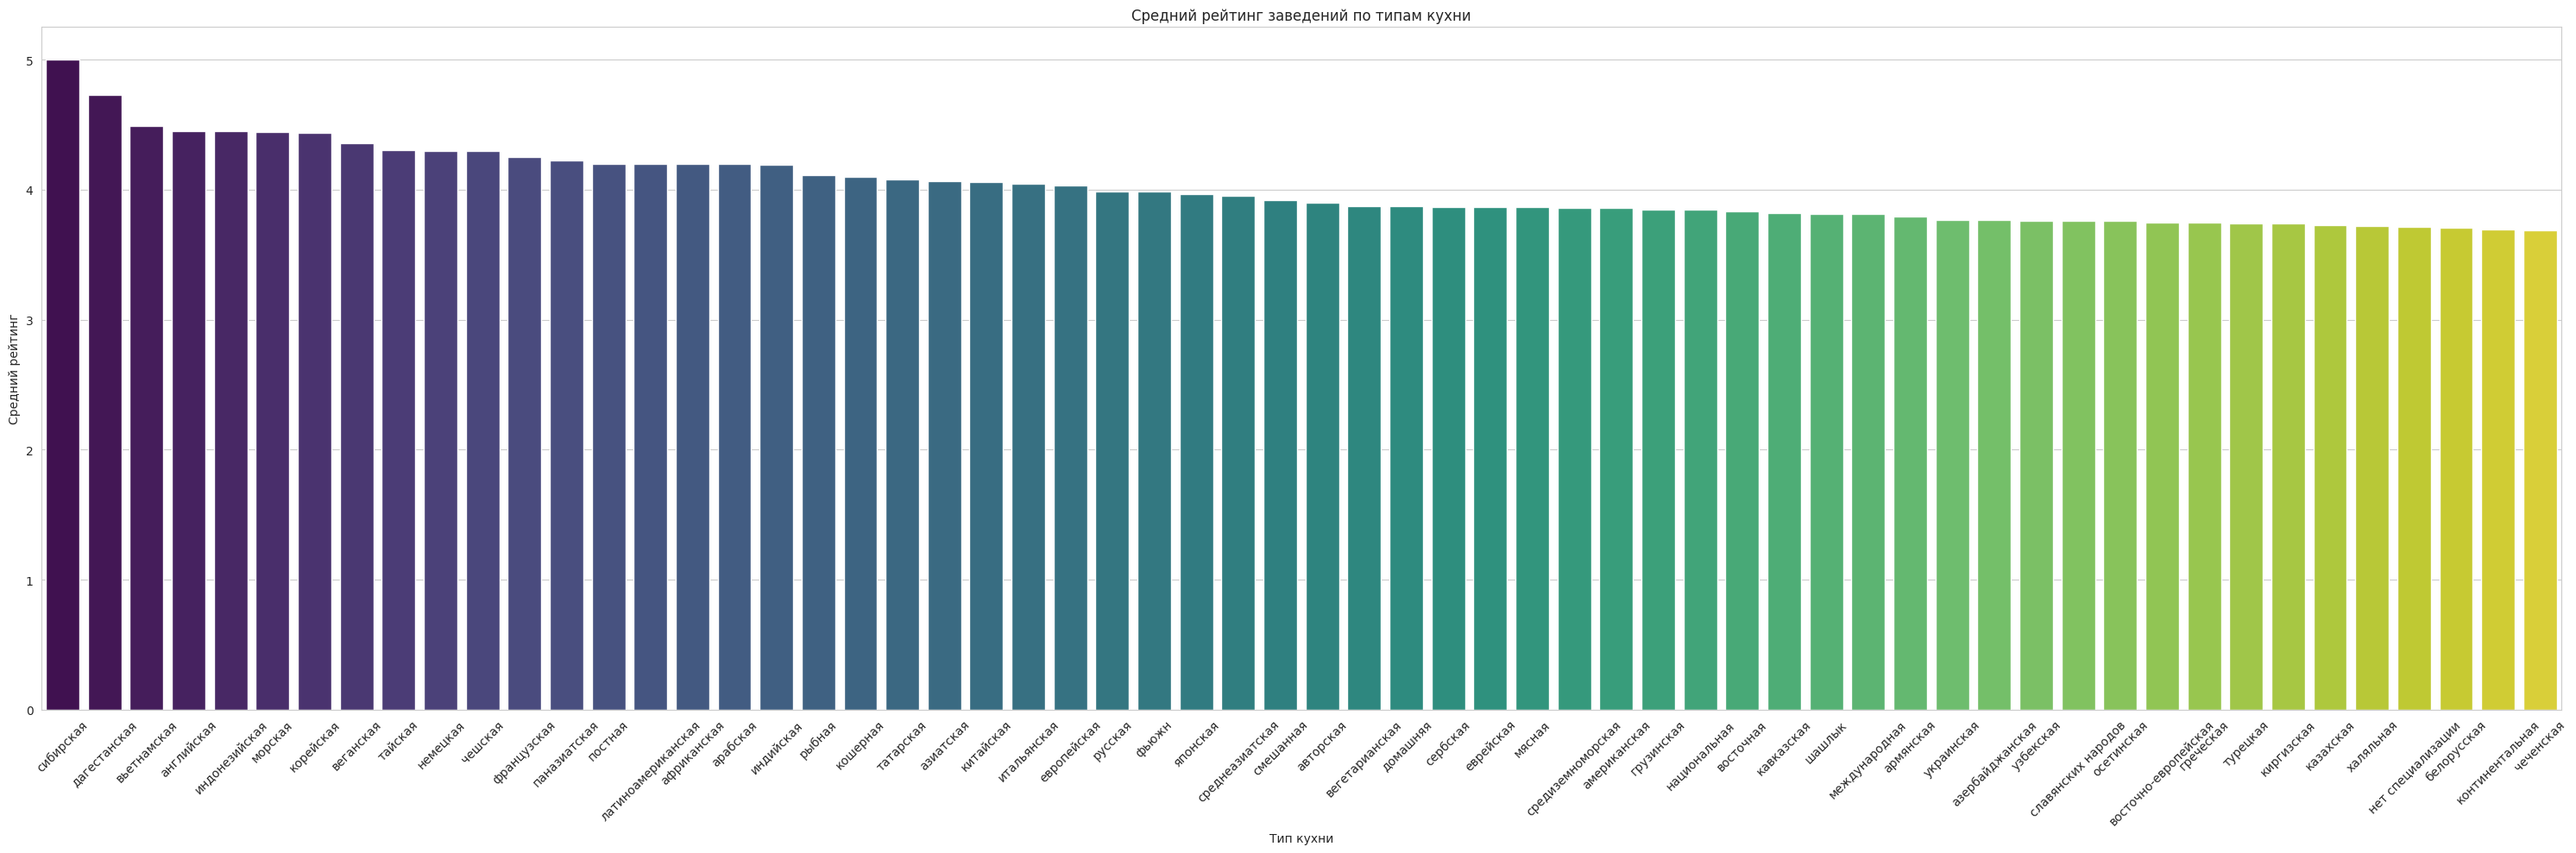

In [5]:
# 1. Разбиваем столбец 'Cuisine' на список типов кухни для каждого заведения и удаляем лишние пробелы
df['Cuisine_list'] = df['Cuisine'].str.split(',')
df['Cuisine_list'] = df['Cuisine_list'].apply(lambda lst: [s.strip() for s in lst] if isinstance(lst, list) else [])

# 2. "Взрываем" DataFrame: одно заведение попадает в каждую категорию кухни, которую оно подаёт
df_exploded = df.explode('Cuisine_list')

# 3. Группируем данные по отдельным типам кухни и вычисляем статистику
cuisine_stats = df_exploded.groupby('Cuisine_list').agg(
    count_restaurants=('Cuisine_list', 'count'),
    avg_rating=('general_rating', 'mean'),
    total_ratings=('general_review_count_with_stars', 'sum')
).reset_index()

# Для более удобного восприятия сортируем по среднему рейтингу
cuisine_stats = cuisine_stats.sort_values(by='avg_rating', ascending=False)

# 4. Строим столбчатую диаграмму
plt.figure(figsize=(30, 10))
ax = sns.barplot(x='Cuisine_list', y='avg_rating', data=cuisine_stats, palette='viridis')
plt.xlabel('Тип кухни')
plt.ylabel('Средний рейтинг')
plt.title('Средний рейтинг заведений по типам кухни')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Здесь мы видим что средняя оценка ресторанов по типу имеет достаточно серьёзный разброс - от 5.0 до почти 3.5. Это интересная статистика, и если верить ей - при открытии ресторана сибирской, дагестанской, вьетнамской, английской или индонезийской кухни мы обречены на успех. Однако эти данные не могут считаться достоверными, так как многие заведения не имеют указания, к какому типу заведения относятся и потому выборка слишком мала, чтобы делать выводы. Однако ради интереса также проведём анализ по категориям.

<ipython-input-6-195ae82c176b>:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=cuisine_stats, x='Cuisine_mapped', y='avg_rating', palette='viridis')


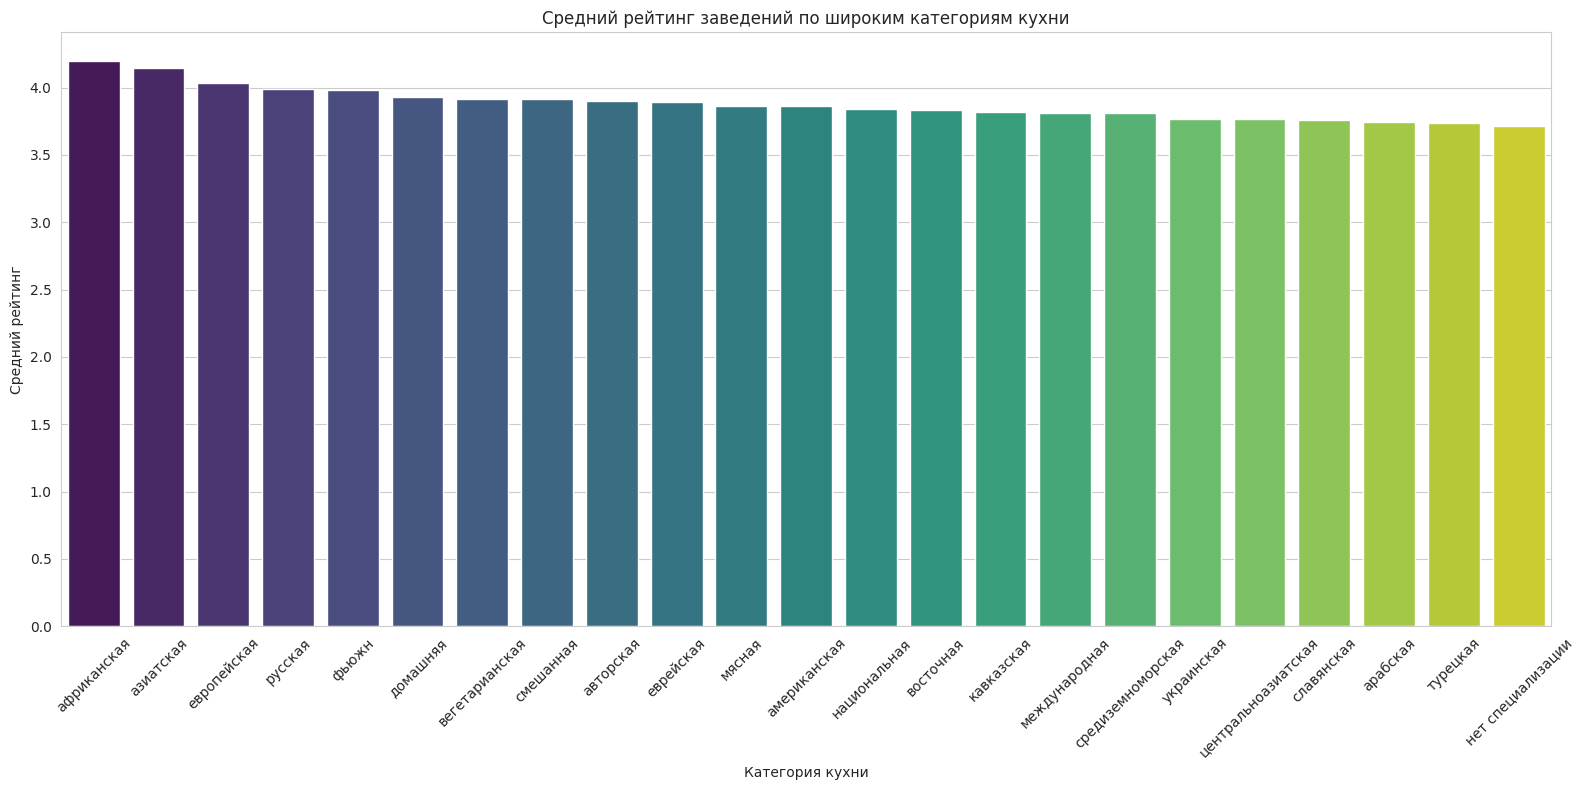

In [6]:
# Словарь для маппинга отдельных типов кухни в более широкие категории
cuisine_mapping = {
    'nan': None,
    'грузинская': 'кавказская',
    'армянская': 'кавказская',
    'кавказская': 'кавказская',
    'дагестанская': 'кавказская',
    'азербайджанская': 'кавказская',
    'осетинская': 'кавказская',
    'шашлык': 'кавказская',

    'корейская': 'азиатская',
    'азиатская': 'азиатская',
    'паназиатская': 'азиатская',
    'японская': 'азиатская',
    'китайская': 'азиатская',
    'тайская': 'азиатская',
    'вьетнамская': 'азиатская',
    'индийская': 'азиатская',
    'индонезийская': 'азиатская',

    'европейская': 'европейская',
    'немецкая': 'европейская',
    'итальянская': 'европейская',
    'чешская': 'европейская',
    'английская': 'европейская',
    'континентальная': 'европейская',
    'французская': 'европейская',

    'средиземноморская': 'средиземноморская',
    'греческая': 'средиземноморская',

    'американская': 'американская',
    'мексиканская': 'американская',
    'латиноамериканская': 'американская',

    'авторская': 'авторская',
    'международная': 'международная',
    'мясная': 'мясная',
    'смешанная': 'смешанная',

    'домашняя': 'домашняя',
    'постная': 'домашняя',

    'турецкая': 'турецкая',

    'национальная': 'национальная',
    'русская': 'русская',

    'фьюжн': 'фьюжн',
    'восточная': 'восточная',
    'арабская': 'арабская',

    'нет специализации': 'нет специализации',

    'вегетарианская': 'вегетарианская',
    'веганская': 'вегетарианская',

    'славянских народов': 'славянская',

    'африканская': 'африканская',

    'казахская': 'центральноазиатская',
    'киргизская': 'центральноазиатская',
    'среднеазиатская': 'центральноазиатская',

    'еврейская': 'еврейская',

    'украинская': 'украинская',

    'халяльная': 'арабская',

    'кошерная': 'еврейская'
}

# Функция для обработки строки с типами кухни:
def map_cuisines(cuisine_str):
    if pd.isna(cuisine_str):
        return []
    # Если в строке есть запятая, разделяем по ней, иначе — по пробелам
    tokens = [token.strip().lower() for token in cuisine_str.split(',')] if ',' in cuisine_str else [token.strip().lower() for token in cuisine_str.split()]
    # Маппим каждый токен, отбрасывая те, для которых нет маппинга или значение равно None
    mapped = [cuisine_mapping.get(token) for token in tokens if cuisine_mapping.get(token)]
    return mapped

# Предполагается, что DataFrame df уже загружен и содержит следующие столбцы:
# - 'Cuisine': строка с типами кухни (например, "китайская, корейская, тайская, японская, шашлык, вьетнамская")
# - 'general_rating': средний рейтинг заведения
# - 'general_review_count_with_stars': суммарное количество оценок заведения

# Применяем маппинг к столбцу 'Cuisine'
df['Cuisine_mapped'] = df['Cuisine'].apply(map_cuisines)

# "Взрываем" DataFrame: каждое заведение попадёт в каждую категорию, к которой оно относится
df_exploded = df.explode('Cuisine_mapped')
df_exploded = df_exploded[df_exploded['Cuisine_mapped'].notna() & (df_exploded['Cuisine_mapped'] != '')]

# Группируем данные по новой категории кухни и вычисляем статистику:
# - Количество заведений,
# - Средний рейтинг,
# - Суммарное число оценок
cuisine_stats = df_exploded.groupby('Cuisine_mapped').agg(
    count_restaurants=('Cuisine_mapped', 'count'),
    avg_rating=('general_rating', 'mean'),
    total_ratings=('general_review_count_with_stars', 'sum')
).reset_index()

# Сортируем по среднему рейтингу для удобства визуализации
cuisine_stats = cuisine_stats.sort_values(by='avg_rating', ascending=False)

# Строим столбчатую диаграмму
plt.figure(figsize=(16, 8))
ax = sns.barplot(data=cuisine_stats, x='Cuisine_mapped', y='avg_rating', palette='viridis')
plt.xlabel('Категория кухни')
plt.ylabel('Средний рейтинг')
plt.title('Средний рейтинг заведений по широким категориям кухни')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Здесь ситуация немного изменилась относительно прошлого графика. На первое место вышла африканская кухня , однако это потому что заведений этой кухни мало. Азиатская, европейская, русская и фьюжн-кухни, что интересно, хоть и, опять же, не вызывает доверия.

# Исследование зависимости кол-ва отзывов заведения от их удалённости от центра Москвы

Здесь гипотеза довольно простая - насколько близко мы должны быть к центру, чтобы получать наибольший приток клиентов и не слишком переплачивать за аренду.

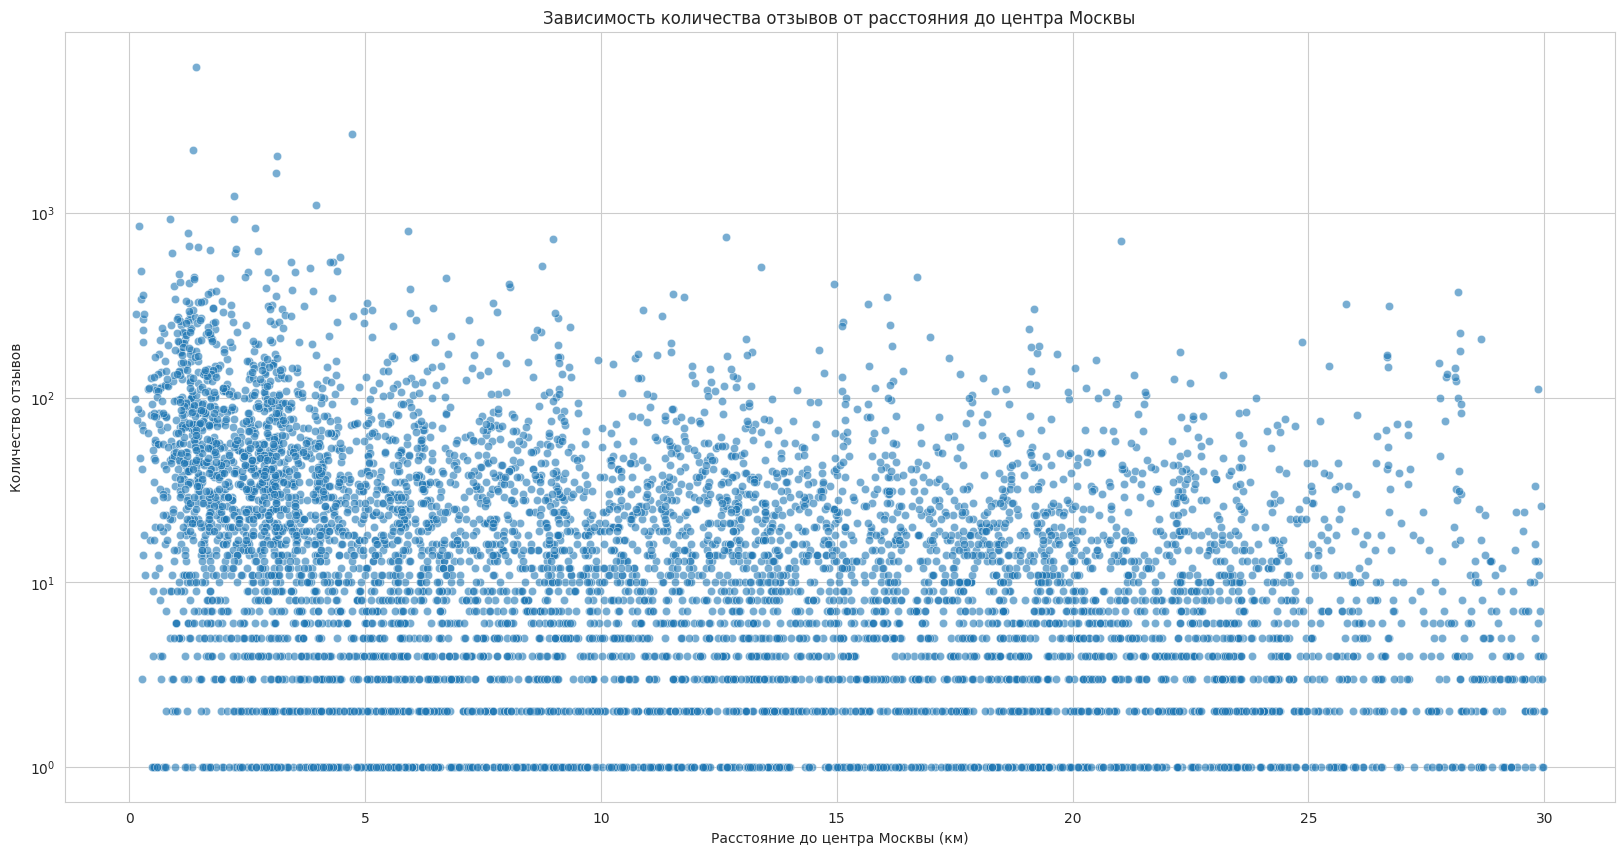

In [7]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x='distance_to_center_km', y='general_review_count', data=df, alpha=0.6)
plt.yscale('log')
plt.xlabel('Расстояние до центра Москвы (км)')
plt.ylabel('Количество отзывов')
plt.title('Зависимость количества отзывов от расстояния до центра Москвы')
plt.show()

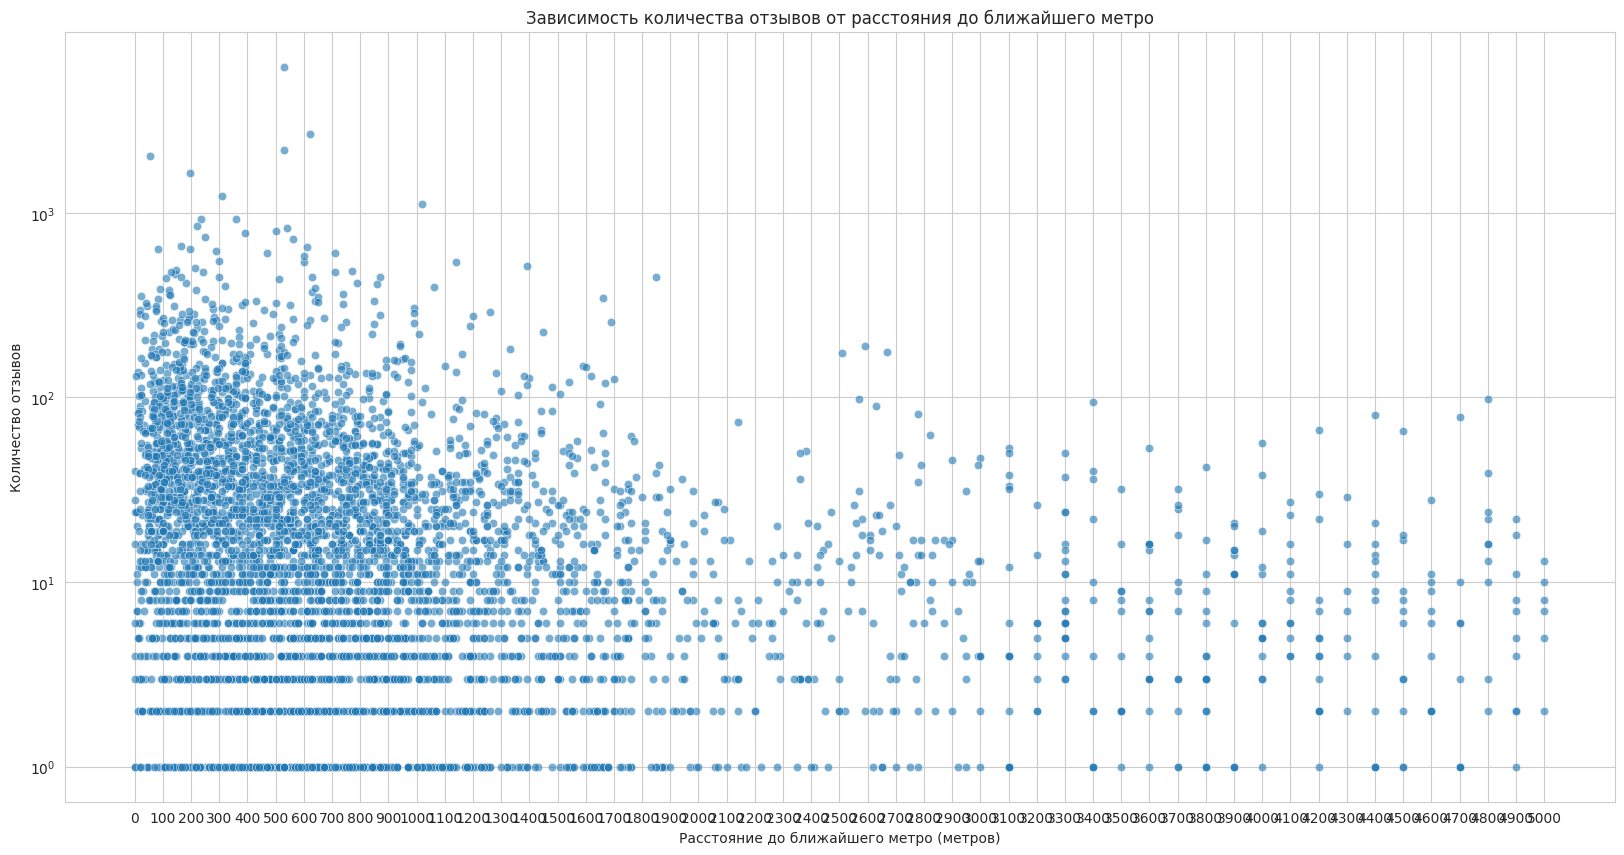

In [9]:
df['metro_dist'] = pd.to_numeric(df['metro_dist'], errors='coerce')
plt.figure(figsize=(20, 10))
sns.scatterplot(x='metro_dist', y='general_review_count', data=df, alpha=0.6)
plt.yscale('log')
plt.xlabel('Расстояние до ближайшего метро (метров)')
plt.ylabel('Количество отзывов')
plt.title('Зависимость количества отзывов от расстояния до ближайшего метро')
# Вычисляем максимальное расстояние и задаем шаг в 100 метров
max_distance = df['metro_dist'].max()
step = 100
plt.xticks(np.arange(0, max_distance + step, step))
plt.show()

Здесь вывод следующий - лучше всего для нашей посещаемости будет находиться в пределах 300 метров до станции метро, а также в пределах 5км от центра.

# Выделить со скольки и до скольки закрыты рестораны

Если смотреть на данные, то большинство ресторанов открываются где-то с 10-12 утра, а закрываются в районе 22-23 часов. Это значит, что если открыть ресторан раньше 10 утра или работать после 23:00, можно получить больше клиентов, у которых нет выбора. Особенно ночью, когда всё закрыто, можно сделать упор на ночную аудиторию. Например - таксистов.

Также можно запустить акции в «мёртвые часы», например, с 15:00 до 17:00, когда многие заведения пустуют. Если ресторан будет рядом с метро или в месте, где ночью остаётся движение, это ещё больше увеличит поток клиентов.

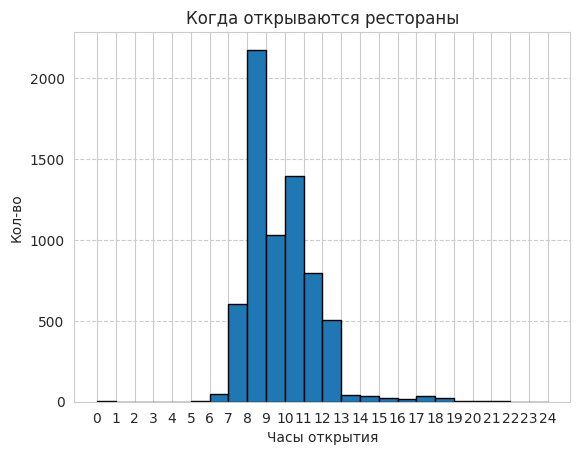

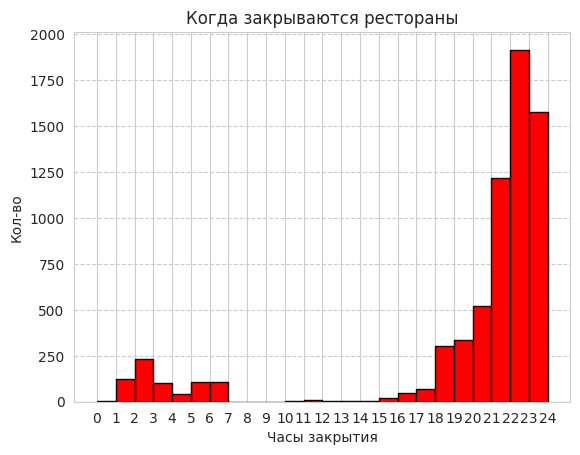

In [10]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import pandas as pd


# Функция извлекает время открытия и закрытия
def get_times(time_str):
    if pd.isna(time_str):
        return None, None
    times = re.findall(r'(\d{1,2}):(\d{2})', str(time_str))
    if times:
        return f"{times[0][0]}:{times[0][1]}", f"{times[-1][0]}:{times[-1][1]}"
    return None, None

# Применяем к столбцу
df[['open_time', 'close_time']] = df['working_hours'].apply(get_times).apply(pd.Series)

# Время в часы
df['open_hour'] = pd.to_datetime(df['open_time'], format='%H:%M', errors='coerce').dt.hour
df['close_hour'] = pd.to_datetime(df['close_time'], format='%H:%M', errors='coerce').dt.hour

# Убираем пустые значения
df = df.dropna(subset=['open_hour', 'close_hour'])

# График открытия
plt.hist(df['open_hour'], bins=range(0, 25), edgecolor='black')
plt.xlabel('Часы открытия')
plt.ylabel('Кол-во')
plt.title('Когда открываются рестораны')
plt.xticks(range(0, 25))
plt.grid(axis='y', linestyle='--')
plt.show()

# График закрытия
plt.hist(df['close_hour'], bins=range(0, 25), edgecolor='black', color='red')
plt.xlabel('Часы закрытия')
plt.ylabel('Кол-во')
plt.title('Когда закрываются рестораны')
plt.xticks(range(0, 25))
plt.grid(axis='y', linestyle='--')
plt.show()


### 1. Зависит ли популярность ресторана от его местоположение относительно центра?


In [37]:
df = pd.read_csv("2GIS_final_filtered.csv")

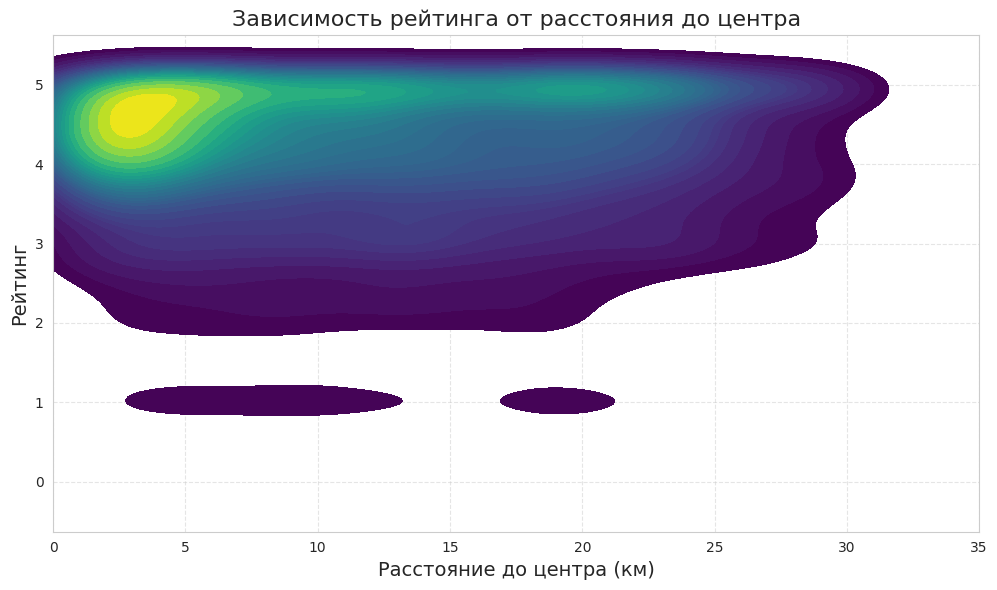

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.kdeplot(
    x=df['distance_to_center_km'],
    y=df['general_rating'],
    cmap='viridis',
    fill=True,
    levels=30)
plt.title('Зависимость рейтинга от расстояния до центра', fontsize=16)
plt.xlabel('Расстояние до центра (км)', fontsize=14)
plt.ylabel('Рейтинг', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
ax = plt.gca()
ax.set_xlim([0,35])

plt.show()

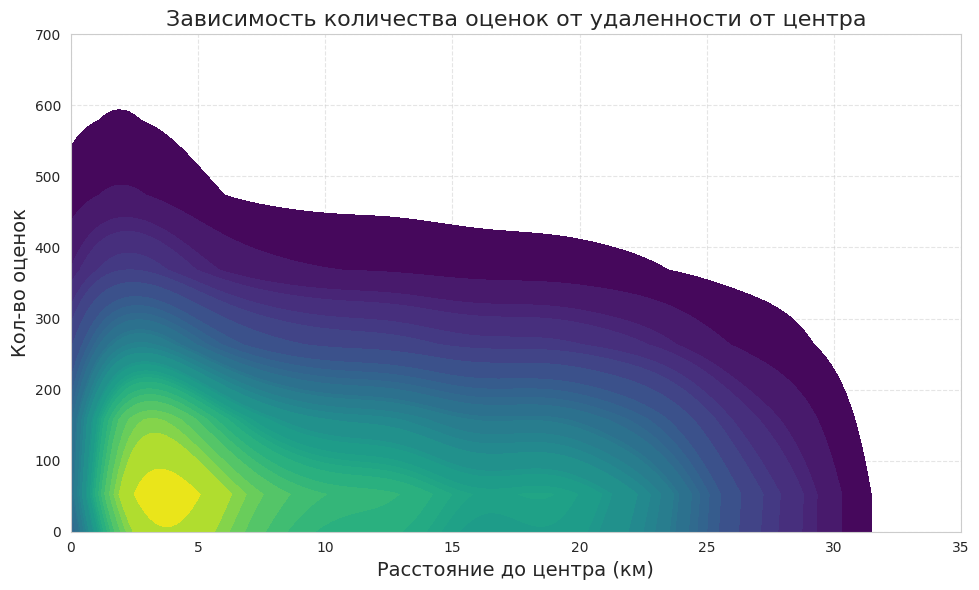

In [39]:
plt.figure(figsize=(10, 6))
sns.kdeplot(
    x=df['distance_to_center_km'],
    y=df['general_review_count_with_stars'],
    cmap='viridis',
    fill=True,
    levels=30
)
plt.title('Зависимость количества оценок от удаленности от центра', fontsize=16)
plt.xlabel('Расстояние до центра (км)', fontsize=14)
plt.ylabel('Кол-во оценок', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
ax = plt.gca()
ax.set_xlim([0,35])
ax.set_ylim([0, 700])
plt.show()

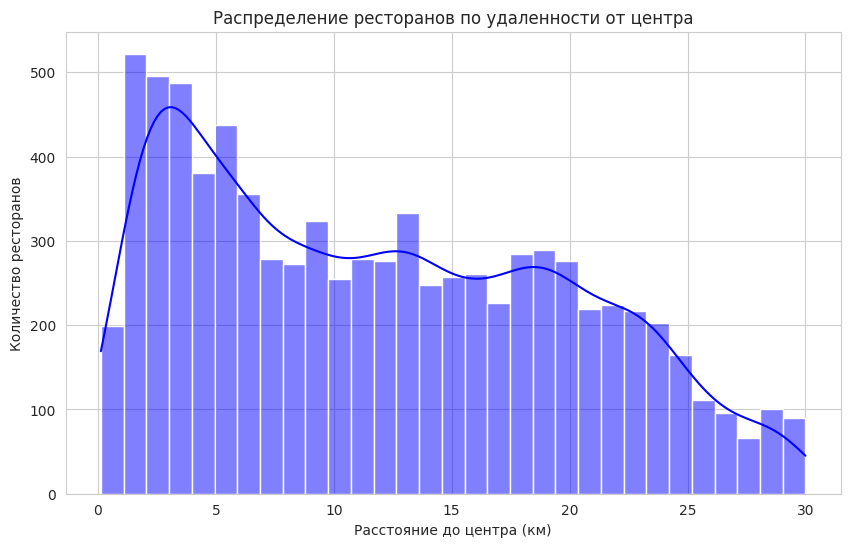

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(df['distance_to_center_km'], bins=31, kde=True, color='blue')
plt.title('Распределение ресторанов по удаленности от центра')
plt.xlabel('Расстояние до центра (км)')
plt.ylabel('Количество ресторанов')
plt.show()

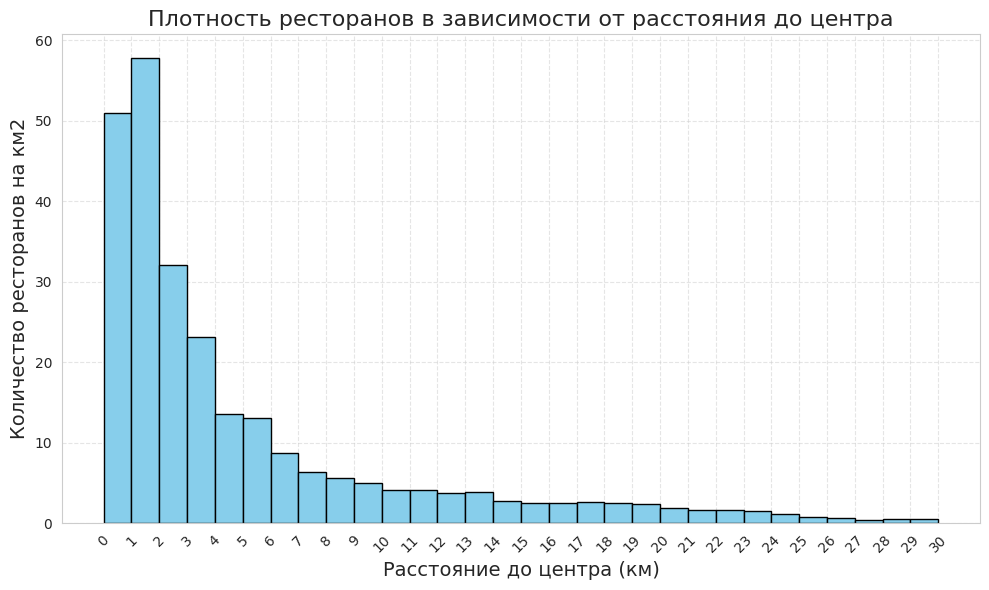

In [41]:
max_distance = df['distance_to_center_km'].max()
bins = np.arange(0, max_distance + 1, 1)
df['distance_bin'] = pd.cut(df['distance_to_center_km'], bins=bins)
restaurant_counts = df['distance_bin'].value_counts().sort_index()
areas = np.pi * (bins[1:]**2 - bins[:-1]**2)
density = restaurant_counts / areas

plt.figure(figsize=(10, 6))
plt.bar(bins[:-1], density, width=1, align='edge', edgecolor='black', color='skyblue')
plt.title('Плотность ресторанов в зависимости от расстояния до центра', fontsize=16)
plt.xlabel('Расстояние до центра (км)', fontsize=14)
plt.ylabel('Количество ресторанов на км2', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(bins, rotation=45)
plt.tight_layout()

plt.show()

In [42]:
df['all_general_review_count'] = df['general_review_count_with_stars'] + df['general_review_count']

<ipython-input-43-19c598732a6f>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby('distance_bin').agg({


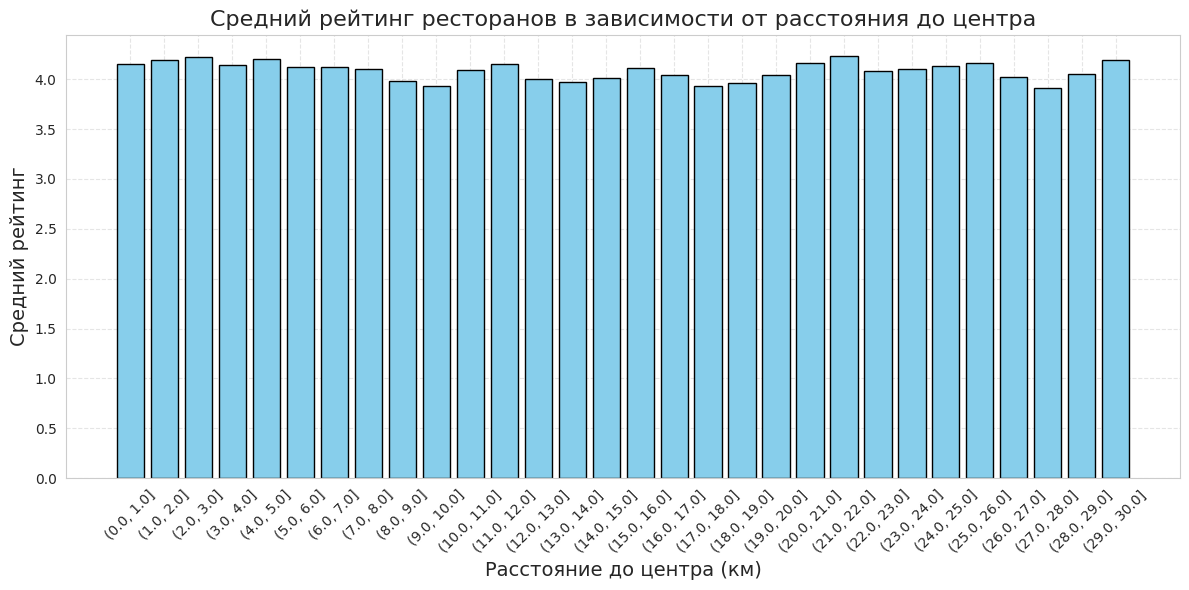

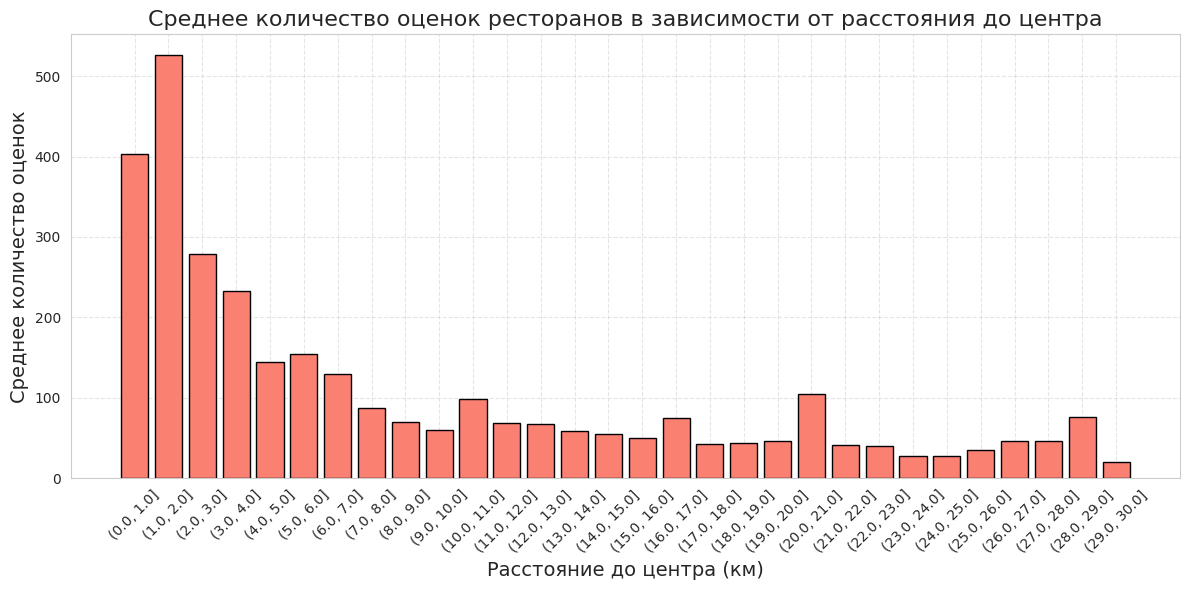

In [43]:
df['distance_bin'] = pd.cut(df['distance_to_center_km'], bins=bins)

grouped_data = df.groupby('distance_bin').agg({
    'general_rating': 'mean',
    'all_general_review_count': 'mean'
}).reset_index()

plt.figure(figsize=(12, 6))
plt.bar(grouped_data['distance_bin'].astype(str), grouped_data['general_rating'], color='skyblue', edgecolor='black')
plt.title('Средний рейтинг ресторанов в зависимости от расстояния до центра', fontsize=16)
plt.xlabel('Расстояние до центра (км)', fontsize=14)
plt.ylabel('Средний рейтинг', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(grouped_data['distance_bin'].astype(str), grouped_data['all_general_review_count'], color='salmon', edgecolor='black')
plt.title('Среднее количество оценок ресторанов в зависимости от расстояния до центра', fontsize=16)
plt.xlabel('Расстояние до центра (км)', fontsize=14)
plt.ylabel('Среднее количество оценок', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Выводы: большее число ресторанов находится в пределах 6 км от центра (есть большая просадка до 1 км и небольшая просадка в диапазоне 4-5 км), что можно объяснить популярностью центра Москвы. Далее этот показатель уменьшается. Очень большой показатель плотности ресторанов в пределах 2 км от центра, высокая от 2 до 4 км, средняя от 4 до 6. В остальных диапазонах плотность очень низкая. Рейтинг не зависит от расстояния (в каждом диапазоне около 4 и постоянно колеблется). А вот популярность сильно зависит от этого показателя, среднее количество отзывов у ресторанов ближе к центру самое высокое.Также можно заметить, что из-за высокой плотности ресторанов людям свойственно не оставлять отзывы о них.

### 2. Анализ по районам Москвы относительно количества ресторанов каждой кухни (МАЛО ДАННЫХ)

In [44]:
metro_districts = {
    "ЗАО": ["Киевская", "Парк Победы", "Проспект Вернадского", "Юго-западная", "Крылатское", "Молодежная", "Кунцевская", "Пионерская", "Филевский Парк", "Багратионовская", "Фили", "Кутузовская", "Студенческая"],
    "ВАО": ["Новогиреево", "Перово", "Шоссе Энтузиастов", "Щелковская", "Первомайская", "Измайловская", "Измайловский Парк", "Семеновская", "Электрозаводская", "Улица Подбельского", "Черкизовская", "Преображенская Площадь", "Сокольники", "Выхино"],
    "ЦАО": ["Рижская", "Проспект Мира", "Сухаревская", "Тургеневская", "Китай-город", "Третьяковская", "Октябрьская", "Белорусская", "Маяковская", "Тверская", "Театральная", "Новокузнецкая", "Павелецкая", "Площадь Ильича", "Марксистская", "Бауманская", "Курская", "Площадь Революции", "Арбатская", "Смоленская", "Красносельская", "Комсомольская", "Красные Ворота", "Чистые Пруды", "Лубянка", "Охотный Ряд", "Библиотека им. Ленина", "Парк Культуры", "Фрунзенская", "Спортивная", "Воробьевы Горы", "Кропоткинская", "Александровский Сад", "Таганская", "Добрынинская", "Краснопресненская", "Новослободская", "Улица 1905 года", "Баррикадная", "Пушкинская", "Кузнецкий Мост", "Пролетарская", "Менделеевская", "Цветной Бульвар", "Чеховская", "Боровицкая", "Полянка", "Серпуховская"],
    "САО": ["Речной Вокзал", "Водный Стадион", "Войковская", "Сокол", "Аэропорт", "Динамо", "Полежаевская", "Беговая", "Петровско-Разумовская", "Тимирязевская"],
    "СВАО": ["ВДНХ", "Медведково", "Бабушкинская", "Свиблово", "Ботанический Сад", "Алексеевская", "Алтуфьево", "Бибирево", "Отрадное", "Владыкино", "Дмитровская", "Савеловская"],
    "СЗАО": ["Планерная", "Сходненская", "Тушинская", "Щукинская", "Октябрьское Поле"],
    "ЮВАО": ["Авиамоторная", "Волгоградский Проспект", "Текстильщики", "Кузьминки", "Рязанский Проспект", "Дубровка", "Кожуховская", "Печатники", "Волжская", "Люблино", "Братиславская", "Марьино"],
    "ЮАО": ["Шаболовская", "Автозаводская", "Коломенская", "Каширская", "Кантемировская", "Царицыно", "Орехово", "Домодедовская", "Красногвардейская", "Варшавская", "Тульская", "Нагатинская", "Нагорная", "Южная", "Пражская", "ул. Академика Янгеля", "Аннино"],
    "ЮЗАО": ["Ленинский Проспект", "Академическая", "Профсоюзная", "Новые Черемушки", "Калужская", "Беляево", "Коньково", "Теплый Стан", "Ясенево", "Битцевский Парк", "Каховская", "Университет", "Нахимовский Проспект", "Севастопольская", "Чертановская", "Бульвар Дмитрия Донского"]
}

In [45]:
from collections import defaultdict

district_cuisine_count = defaultdict(lambda: defaultdict(int))

for index, row in df.iterrows():
    metro = row["nearest_metro"]
    cuisines = row["Cuisine"]
    if pd.isna(cuisines):
        continue
    cuisines = cuisines.split(", ") if isinstance(cuisines, str) else [cuisines]
    district = None
    for d, stations in metro_districts.items():
        if metro in stations:
            district = d
            break
    if district:
        for cuisine in cuisines:
            district_cuisine_count[district][cuisine] += 1
result = {district: dict(cuisine_count) for district, cuisine_count in district_cuisine_count.items()}
print(result)

{'ЦАО': {'грузинская': 71, 'корейская': 8, 'азиатская': 50, 'европейская': 91, 'американская': 30, 'паназиатская': 23, 'морская': 7, 'рыбная': 11, 'итальянская': 64, 'авторская': 49, 'международная': 30, 'мясная': 39, 'смешанная': 48, 'средиземноморская': 34, 'вегетарианская': 42, 'домашняя': 45, 'постная': 11, 'японская': 20, 'русская': 42, 'китайская': 10, 'тайская': 7, 'фьюжн': 3, 'восточная': 41, 'шашлык': 39, 'кавказская': 57, 'национальная': 41, 'турецкая': 30, 'узбекская': 35, 'армянская': 32, 'азербайджанская': 30, 'чешская': 1, 'индийская': 7, 'украинская': 27, 'еврейская': 4, 'веганская': 6, 'среднеазиатская': 2, 'вьетнамская': 26, 'арабская': 1, 'восточно-европейская': 25, 'французская': 13, 'халяльная': 30, 'нет специализации': 26, 'татарская': 1, 'сибирская': 1, 'славянских народов': 25, 'белорусская': 24, 'казахская': 24, 'греческая': 24, 'континентальная': 24, 'осетинская': 25, 'киргизская': 24, 'чеченская': 24, 'дагестанская': 1}, 'СВАО': {'европейская': 31, 'немецкая':

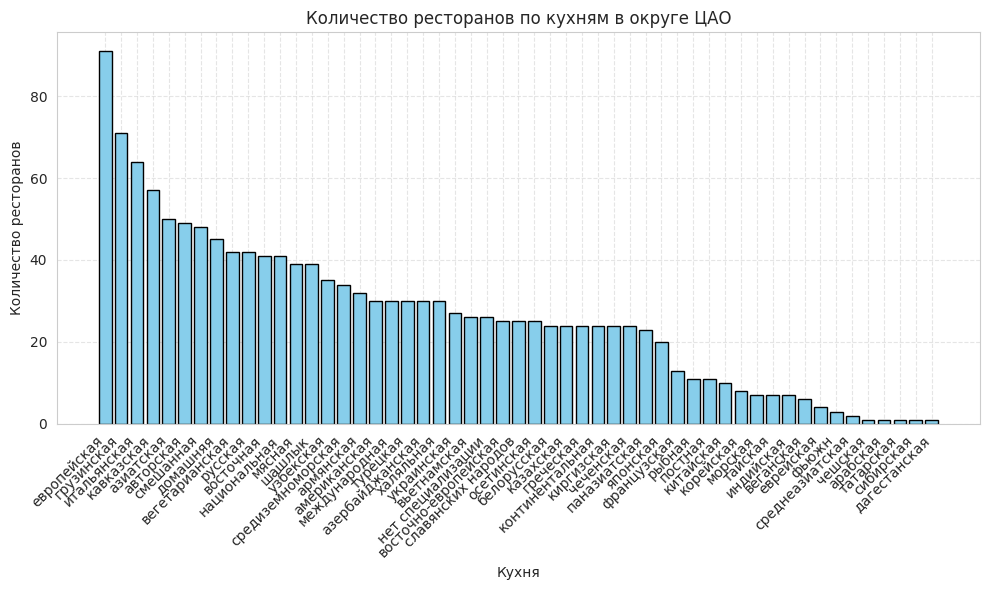

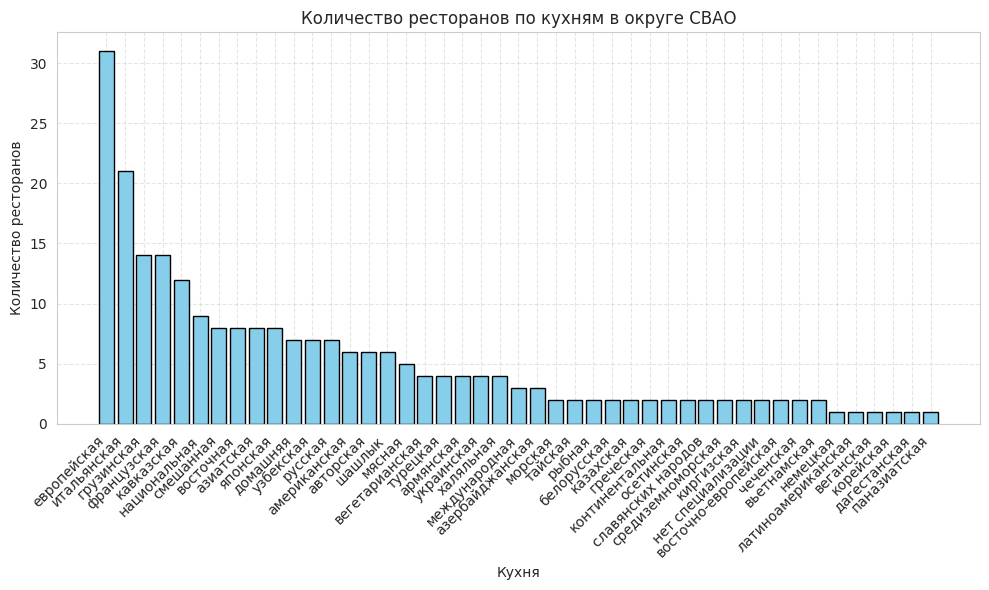

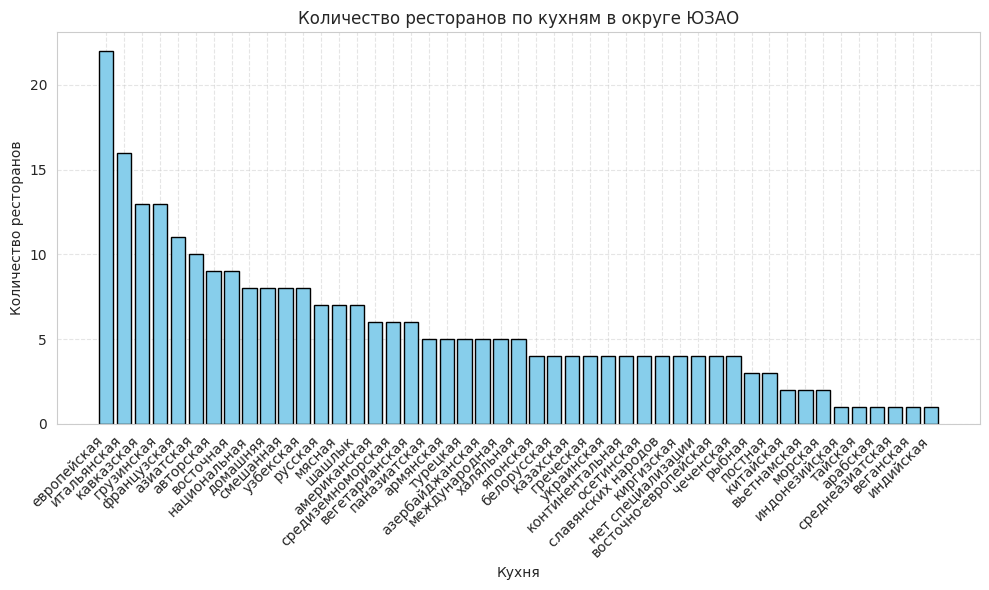

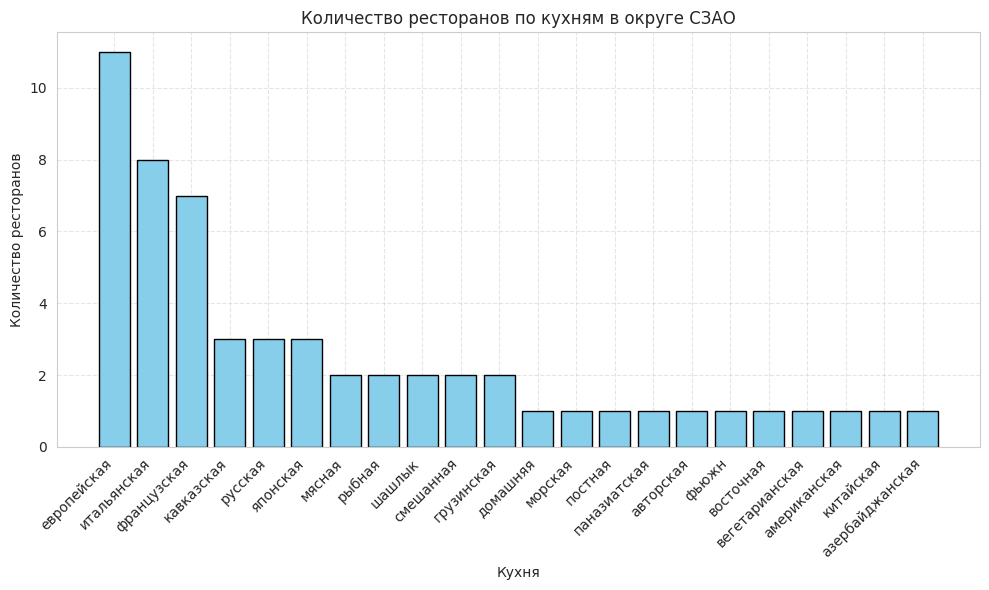

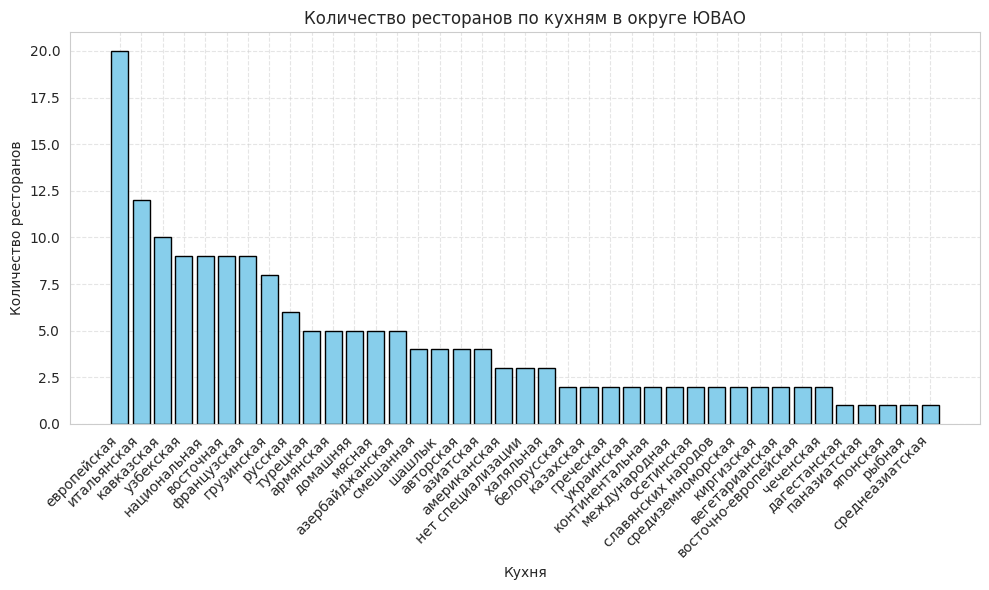

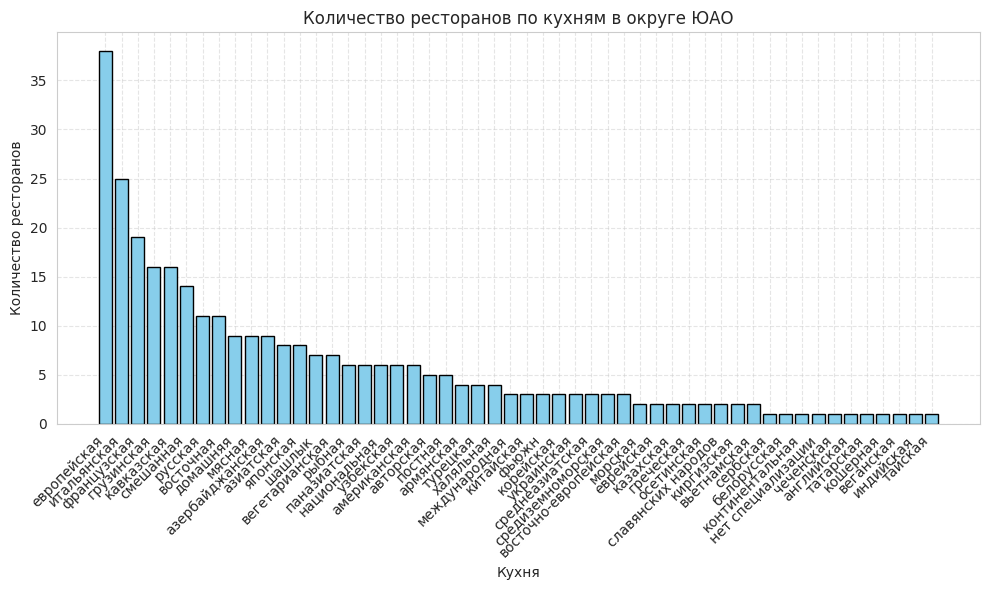

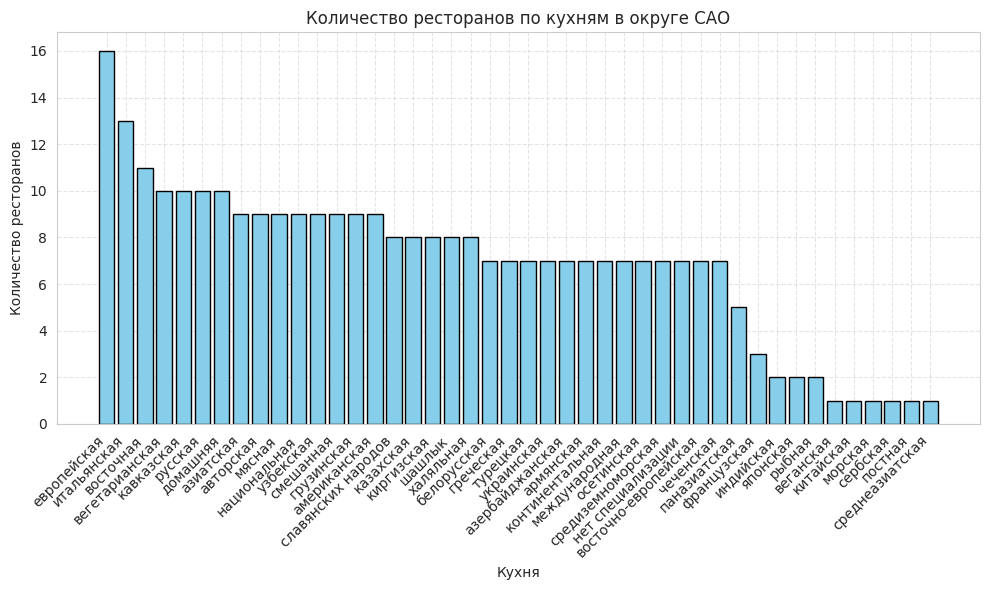

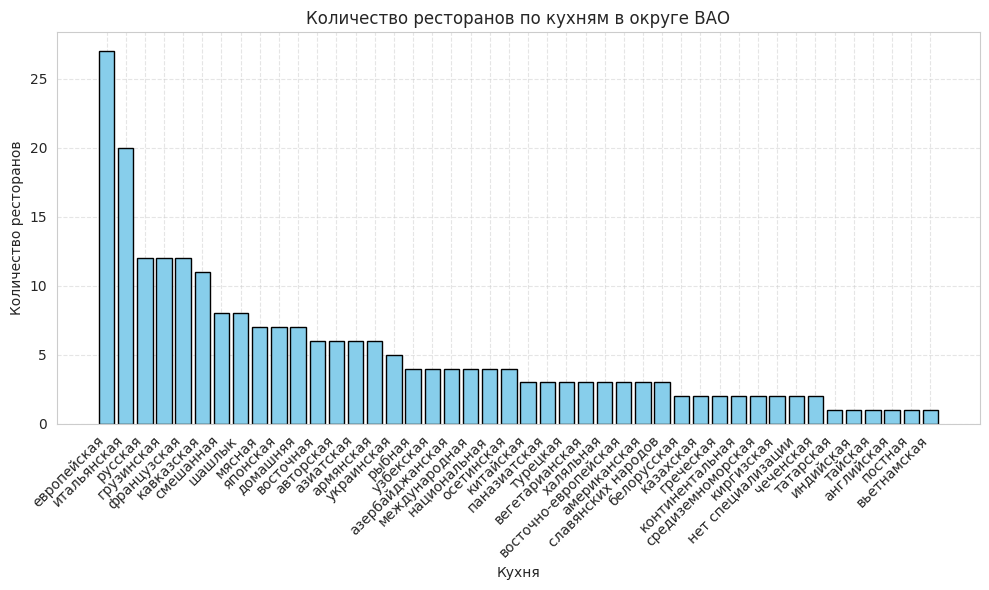

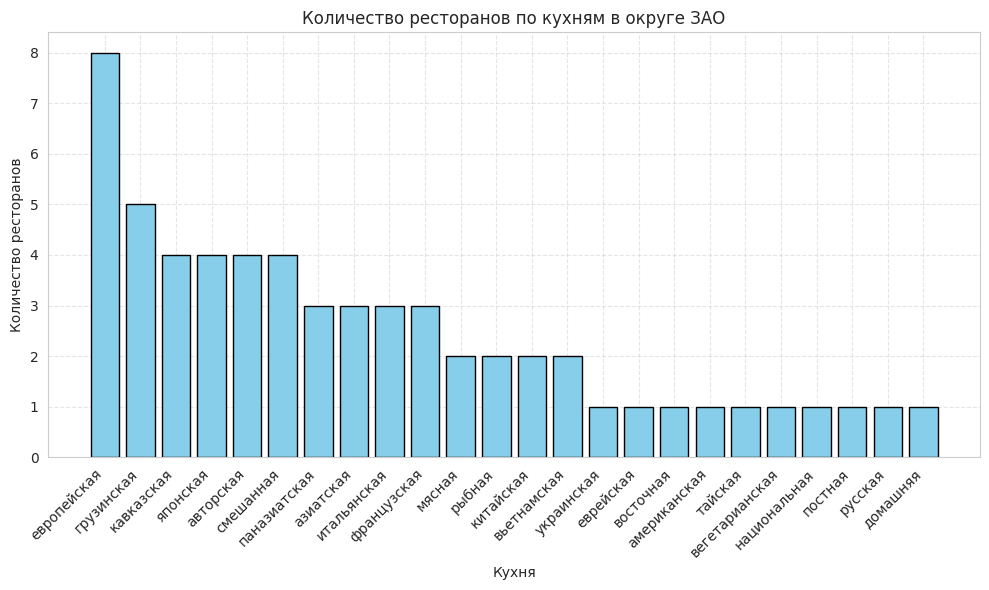

In [46]:
for district, cuisine_count in result.items():
    sorted_cuisines = sorted(cuisine_count.items(), key=lambda x: x[1], reverse=True)
    cuisines, counts = zip(*sorted_cuisines)  # Разделяем на два списка: кухни и их количество

    plt.figure(figsize=(10, 6))
    plt.bar(cuisines, counts, color='skyblue', edgecolor='black')
    plt.title(f"Количество ресторанов по кухням в округе {district}")
    plt.xlabel("Кухня")
    plt.ylabel("Количество ресторанов")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

Выводы: европейская кухня является абсолютным лидером всех округов. Итальянская кухня уверенно занимает второе место, несмотря на небольшие показатели в ЗАО. Также очень популярными являются кавказская, грузинская, французская, русская и азиатская. Из-за недостатка данных нельзя делать серьезные выводы, но общие тенденции видны (клиенты в основном предпочитают вышеперечисленныве кухни)

### 3. Часто ли у самых популярных ресторанов есть накрученные отзывы  (рейтинг высокий, количество отзывов большое, а процент, написанных словами (не просто оценка), минимальный.


In [47]:
df['text_review_percentage'] = (df['general_review_count'] / (df['general_review_count_with_stars'] + df['general_review_count'])) * 100

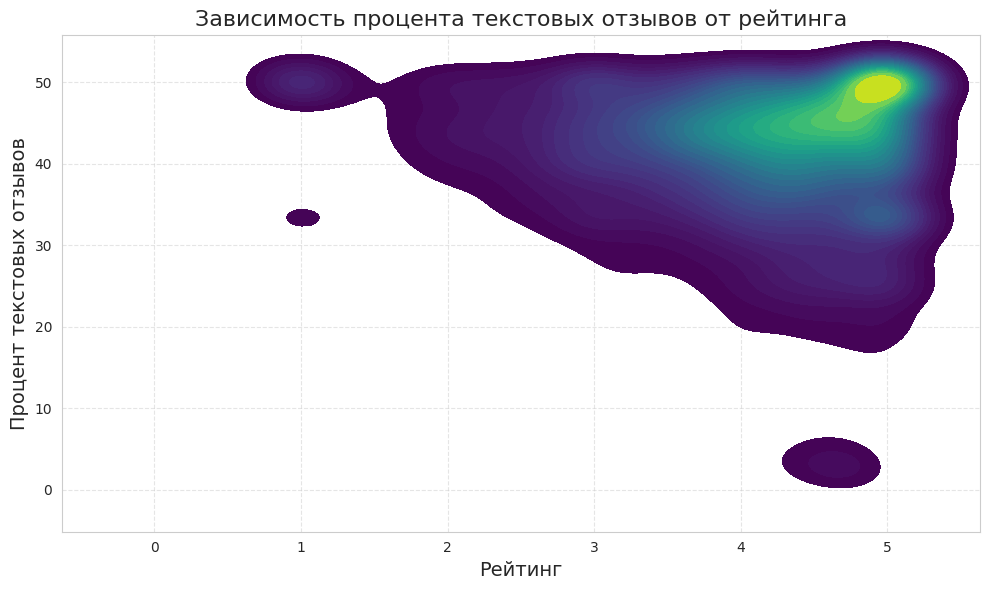

In [48]:
plt.figure(figsize=(10, 6))
sns.kdeplot(
    x=df['general_rating'],
    y=df['text_review_percentage'],
    cmap='viridis',
    fill=True,
    levels=30
)

plt.title('Зависимость процента текстовых отзывов от рейтинга', fontsize=16)
plt.xlabel('Рейтинг', fontsize=14)
plt.ylabel('Процент текстовых отзывов', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()

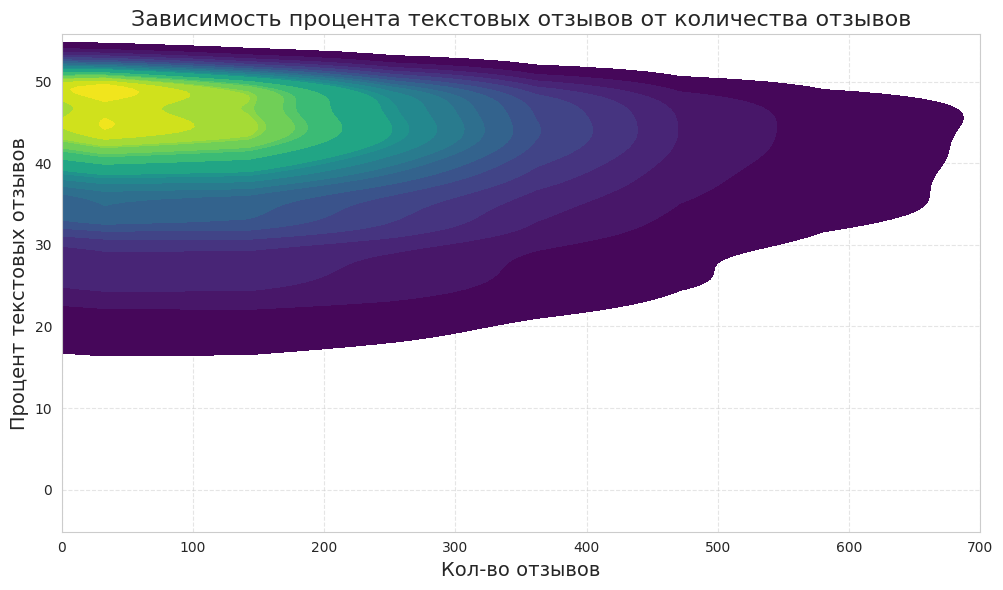

In [49]:
plt.figure(figsize=(10, 6))
sns.kdeplot(
    x=df['general_review_count_with_stars'] + df['general_review_count'],
    y=df['text_review_percentage'],
    cmap='viridis',
    fill=True,
    levels=20
)

plt.title('Зависимость процента текстовых отзывов от количества отзывов', fontsize=16)
plt.xlabel('Кол-во отзывов', fontsize=14)
plt.ylabel('Процент текстовых отзывов', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
ax = plt.gca()
ax.set_xlim([0,700])

plt.show()

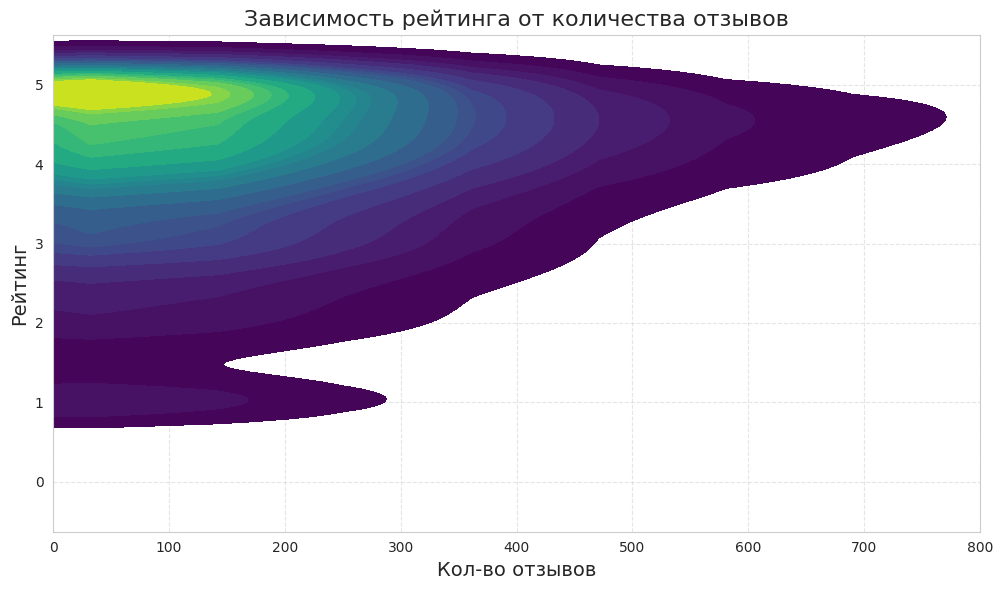

In [50]:
plt.figure(figsize=(10, 6))
sns.kdeplot(
    x=df['general_review_count_with_stars'] + df['general_review_count'],
    y=df['general_rating'],
    cmap='viridis',
    fill=True,
    levels=20
)

plt.title('Зависимость рейтинга от количества отзывов', fontsize=16)
plt.xlabel('Кол-во отзывов', fontsize=14)
plt.ylabel('Рейтинг', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
ax = plt.gca()
ax.set_xlim([0,800])

plt.show()

Выводы: наибольшее количество заведений имеет до 300 отзывов, из которых 40-50% текстовых, и очень высокий рейтинг (около 5). У ресторанов с наибольшим количеством отзывов в среднем рейтинг выше и чуть больше процент текстовых. Популярные рестораны НЕ накручивают отзывы.

### 4. На сколько расположение ресторана на первом этаже (в отдельном заведении в частности) влияет на количество посетителей и рейтинг заведения?

<ipython-input-51-2200f27059a9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[first_label, second_label], y=[first_value, second_value], ax=ax, palette='coolwarm')
<ipython-input-51-2200f27059a9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[first_label, second_label], y=[first_value, second_value], ax=ax, palette='coolwarm')
<ipython-input-51-2200f27059a9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[first_label, second_label], y=[first_value, second_value], ax=ax, palette='coolwarm')
<ipython-input-51-2200f27059a9>:7: Fu

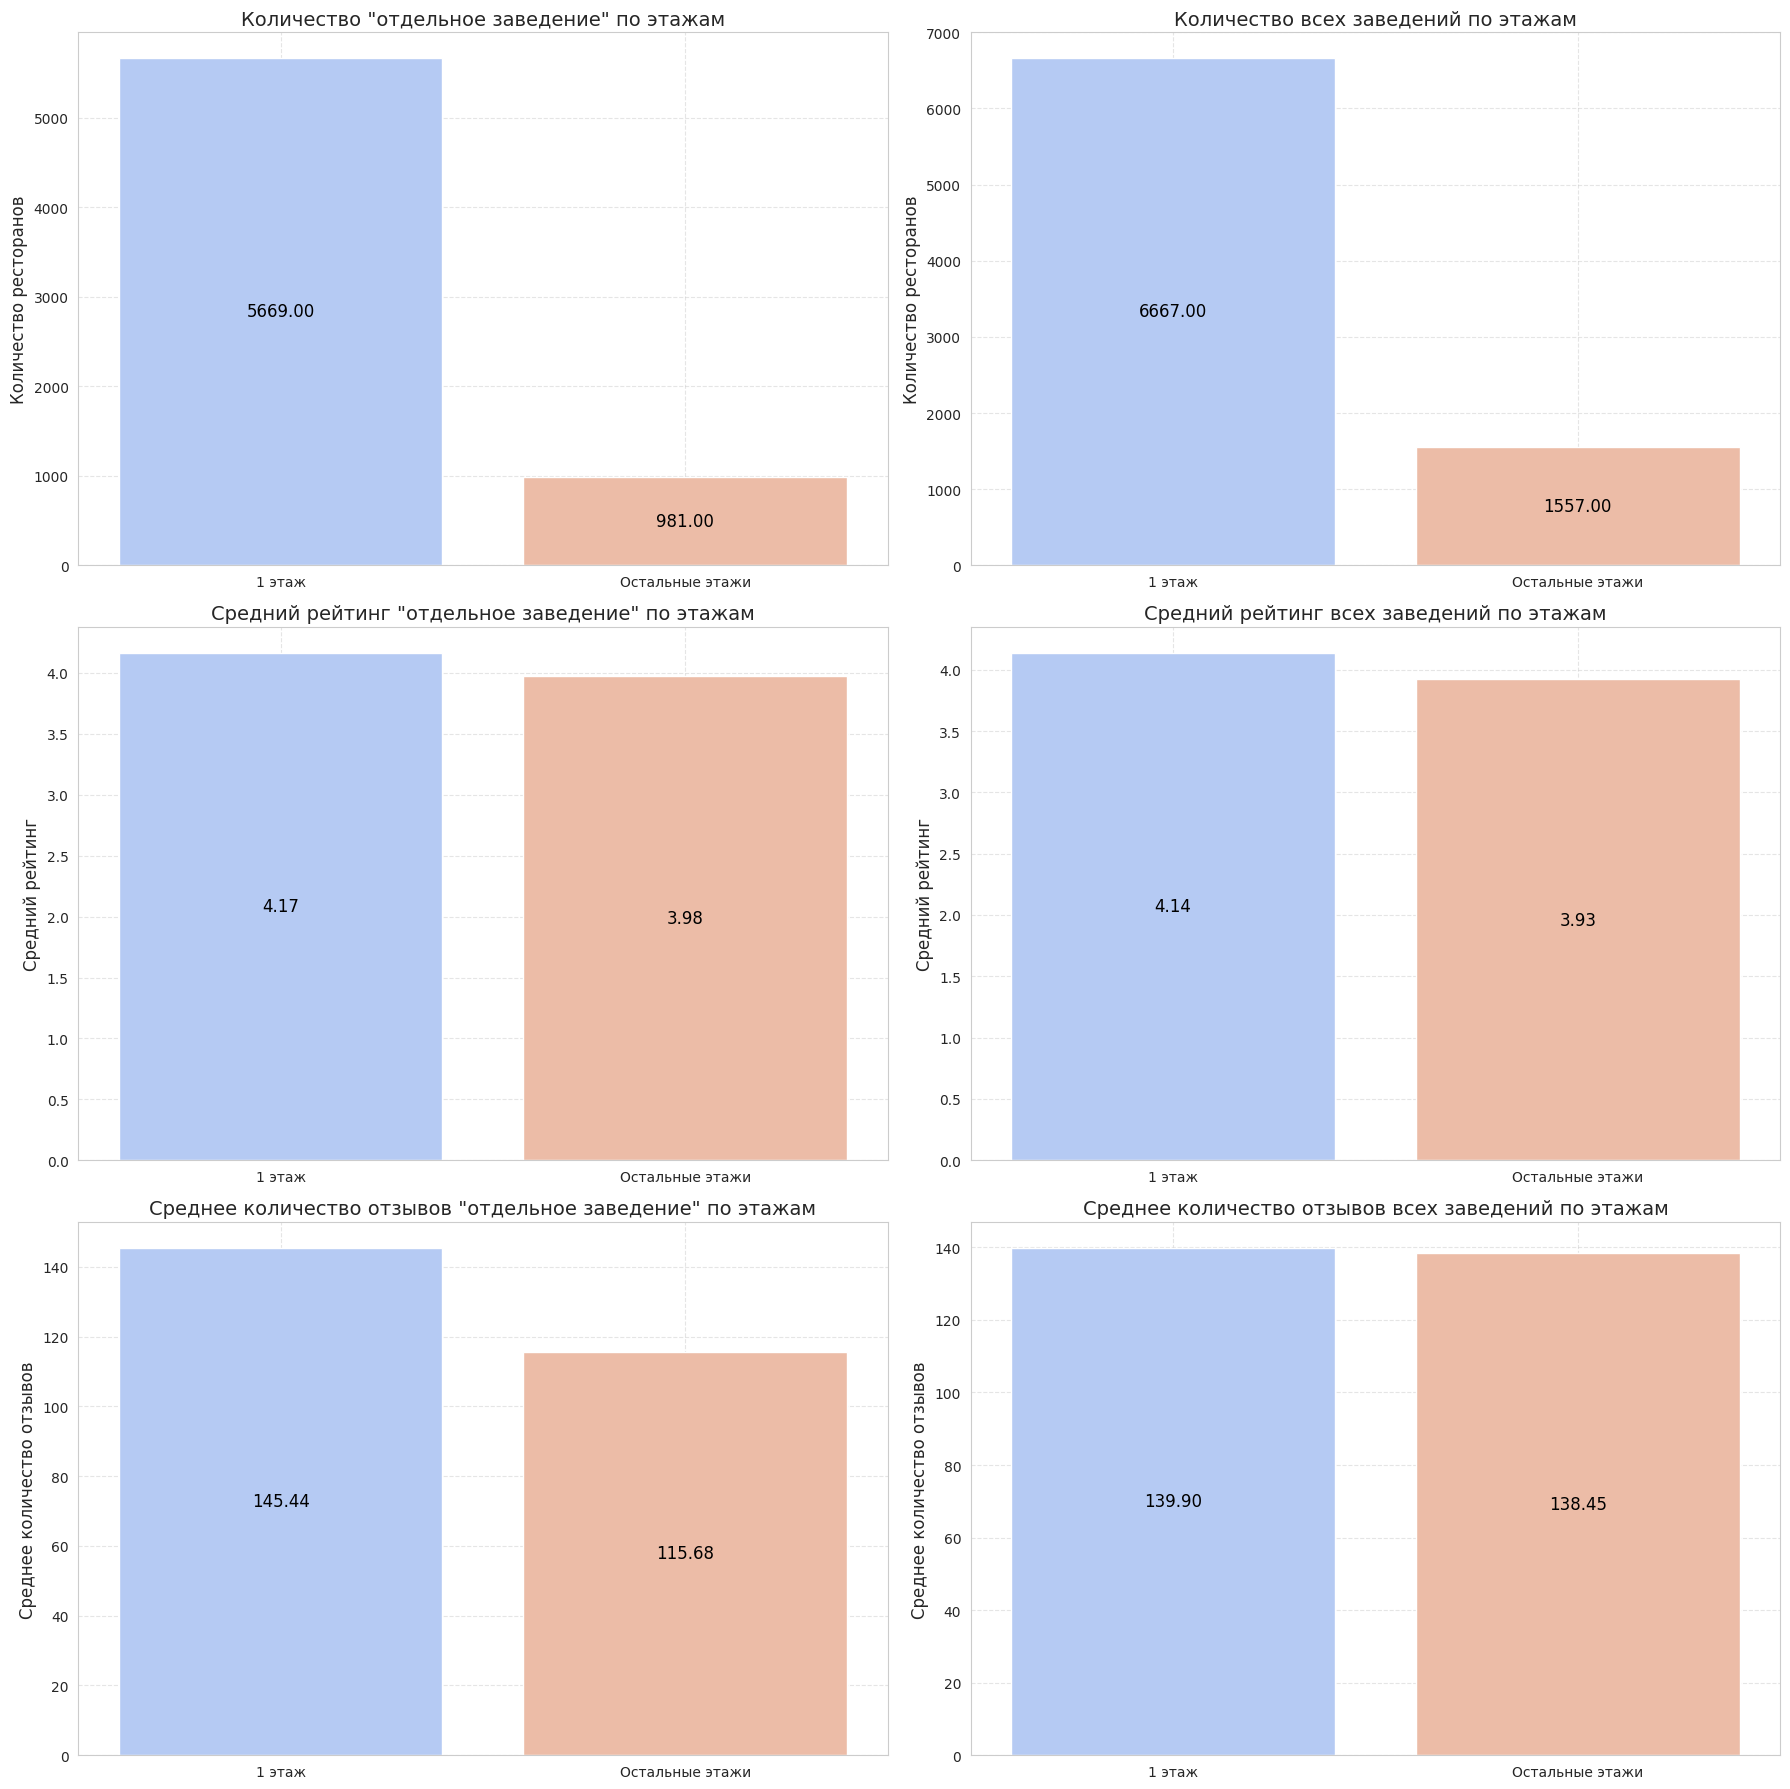

In [51]:
first_floor_mask = df['address_comment'].str.contains(r'1\s|1-', case=False, regex=True)
separate_building_mask = df['building_name'] == 'Отдельное заведение'

fig, axes = plt.subplots(3, 2, figsize=(18, 18))

def plot_bar(ax, title, first_value, second_value, first_label, second_label, ylabel):
    sns.barplot(x=[first_label, second_label], y=[first_value, second_value], ax=ax, palette='coolwarm')
    ax.set_title(title, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.5)

    for i, value in enumerate([first_value, second_value]):
        ax.text(i, value / 2, f'{value:.2f}', ha='center', va='center', fontsize=12, color='black')

# Диаграмма 1: Количество "отдельное заведение" на 1 этаже и остальных этажах
count_separate_first_floor = df[separate_building_mask & first_floor_mask].shape[0]
count_separate_other_floors = df[separate_building_mask & ~first_floor_mask].shape[0]
plot_bar(axes[0, 0],
         'Количество "отдельное заведение" по этажам',
         count_separate_first_floor, count_separate_other_floors,
         '1 этаж', 'Остальные этажи', 'Количество ресторанов')

# Диаграмма 2: Количество всех заведений на 1 этаже и остальных этажах
count_all_first_floor = df[first_floor_mask].shape[0]
count_all_other_floors = df[~first_floor_mask].shape[0]
plot_bar(axes[0, 1],
         'Количество всех заведений по этажам',
         count_all_first_floor, count_all_other_floors,
         '1 этаж', 'Остальные этажи', 'Количество ресторанов')

# Диаграмма 3: Средний рейтинг "отдельное заведение" на 1 этаже и остальных этажах
rating_separate_first_floor = df[separate_building_mask & first_floor_mask]['general_rating'].mean()
rating_separate_other_floors = df[separate_building_mask & ~first_floor_mask]['general_rating'].mean()
plot_bar(axes[1, 0],
         'Средний рейтинг "отдельное заведение" по этажам',
         rating_separate_first_floor, rating_separate_other_floors,
         '1 этаж', 'Остальные этажи', 'Средний рейтинг')

# Диаграмма 4: Средний рейтинг всех заведений на 1 этаже и остальных этажах
rating_all_first_floor = df[first_floor_mask]['general_rating'].mean()
rating_all_other_floors = df[~first_floor_mask]['general_rating'].mean()
plot_bar(axes[1, 1],
         'Средний рейтинг всех заведений по этажам',
         rating_all_first_floor, rating_all_other_floors,
         '1 этаж', 'Остальные этажи', 'Средний рейтинг')

# Диаграмма 5: Среднее количество отзывов "отдельное заведение" на 1 этаже и остальных этажах
reviews_separate_first_floor = df[separate_building_mask & first_floor_mask]['all_general_review_count'].mean()
reviews_separate_other_floors = df[separate_building_mask & ~first_floor_mask]['all_general_review_count'].mean()
plot_bar(axes[2, 0],
         'Среднее количество отзывов "отдельное заведение" по этажам',
         reviews_separate_first_floor, reviews_separate_other_floors,
         '1 этаж', 'Остальные этажи', 'Среднее количество отзывов')

# Диаграмма 6: Среднее количество отзывов всех заведений на 1 этаже и остальных этажах
reviews_all_first_floor = df[first_floor_mask]['all_general_review_count'].mean()
reviews_all_other_floors = df[~first_floor_mask]['all_general_review_count'].mean()
plot_bar(axes[2, 1],
         'Среднее количество отзывов всех заведений по этажам',
         reviews_all_first_floor, reviews_all_other_floors,
         '1 этаж', 'Остальные этажи', 'Среднее количество отзывов')

plt.tight_layout()
plt.show()

Выводы: действительно, ресторанов на 1 этаже в 4-5 раз больше чем на всех остальных, это может быть связано с лучшей доступностью, хорошей видимостью, высокой проходимостью и привлекательностью для случайных посетителей. Рейтинг таких ресторанов тоже выше, что говорит о более приятном впечатлении клиентов о таких заведениях. Среднее количество отзывов сильно выше только у заведений, которые находятся в отдельных зданиях. Действительно, проходимость в торговых центрах высокая независимо от этажа, а в отдельных заведениях люди предпочитают принимать пищу на первых этажах.

### 5. Выгоднее открыть локальный ресторан или работать по франшизе?

<ipython-input-52-ff945080e330>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=categories, y=ratings, palette='coolwarm', edgecolor='black')


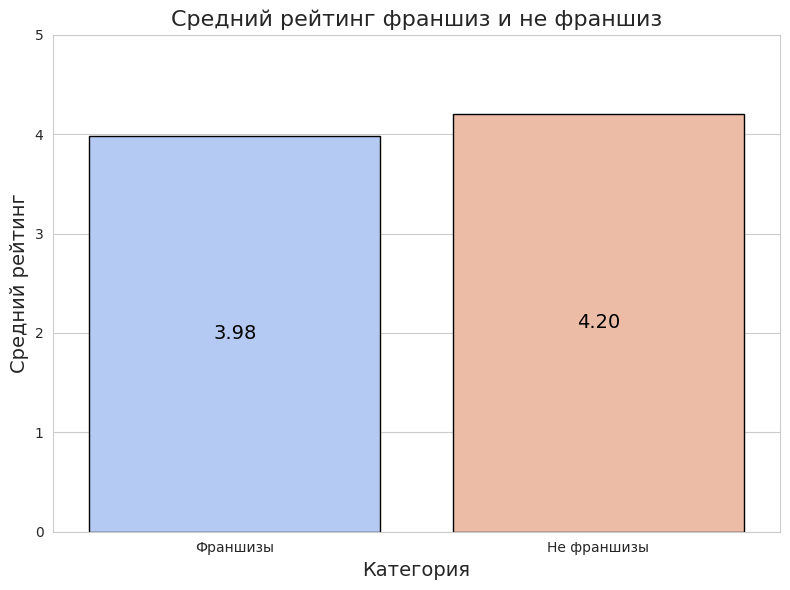

In [52]:
franchise_mask = df['Restaurant_name'].map(df['Restaurant_name'].value_counts()) > 1
franchises = df[franchise_mask]
non_franchises = df[~franchise_mask]
avg_rating_franchises = franchises['general_rating'].mean()
avg_rating_non_franchises = non_franchises['general_rating'].mean()
categories = ['Франшизы', 'Не франшизы']
ratings = [avg_rating_franchises, avg_rating_non_franchises]

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=categories, y=ratings, palette='coolwarm', edgecolor='black')
ax.bar_label(ax.containers[0], fmt='%.2f', label_type='center', color='black', fontsize=14)
ax.bar_label(ax.containers[1], fmt='%.2f', label_type='center', color='black', fontsize=14)
plt.title('Средний рейтинг франшиз и не франшиз', fontsize=16)
plt.xlabel('Категория', fontsize=14)
plt.ylabel('Средний рейтинг', fontsize=14)
plt.ylim(0, 5)
plt.tight_layout()
plt.show()

<ipython-input-54-072c42193a40>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_franchises_by_reviews.values, y=top_20_franchises_by_reviews.index, ax=axes[0], palette='viridis')
<ipython-input-54-072c42193a40>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_non_franchises_by_reviews.values, y=top_20_non_franchises_by_reviews.index, ax=axes[1], palette='magma')


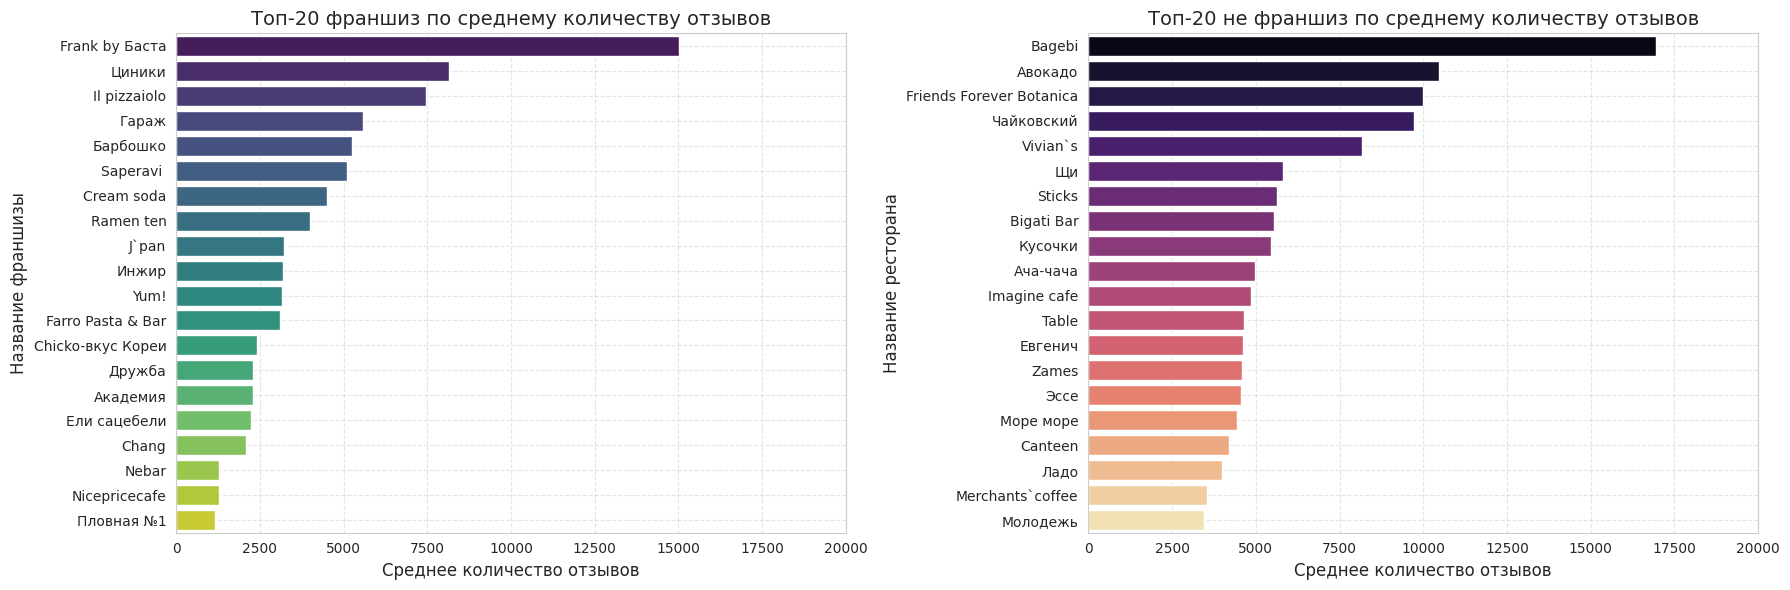

In [54]:
top_20_franchises_by_reviews = franchises.groupby('Restaurant_name')['all_general_review_count'].mean().sort_values(ascending=False).head(20)
top_20_non_franchises_by_reviews = non_franchises.groupby('Restaurant_name')['all_general_review_count'].mean().sort_values(ascending=False).head(20)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Первая диаграмма: топ-20 франшиз по среднему количеству отзывов
sns.barplot(x=top_20_franchises_by_reviews.values, y=top_20_franchises_by_reviews.index, ax=axes[0], palette='viridis')
axes[0].set_title('Топ-20 франшиз по среднему количеству отзывов', fontsize=14)
axes[0].set_xlabel('Среднее количество отзывов', fontsize=12)
axes[0].set_ylabel('Название франшизы', fontsize=12)
axes[0].set_xlim(0, 20000)
axes[0].grid(True, linestyle='--', alpha=0.5)

# Вторая диаграмма: топ-20 не франшиз по среднему количеству отзывов
sns.barplot(x=top_20_non_franchises_by_reviews.values, y=top_20_non_franchises_by_reviews.index, ax=axes[1], palette='magma')
axes[1].set_title('Топ-20 не франшиз по среднему количеству отзывов', fontsize=14)
axes[1].set_xlabel('Среднее количество отзывов', fontsize=12)
axes[1].set_ylabel('Название ресторана', fontsize=12)
axes[1].set_xlim(0, 20000)
axes[1].grid(True, linestyle='--', alpha=0.5)

# 7. Настройка отображения
plt.tight_layout()
plt.show()

<ipython-input-55-b3711a36d64f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=reviews, palette='coolwarm', edgecolor='black')


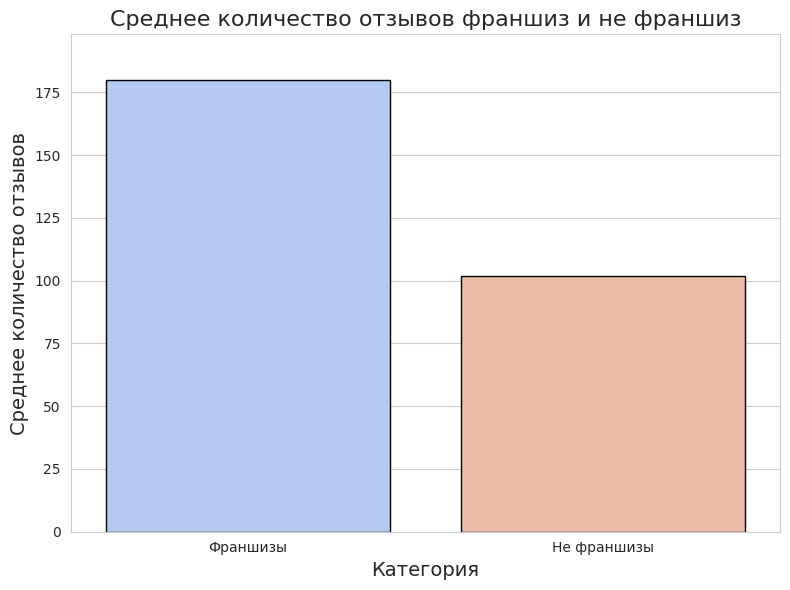

In [55]:
avg_reviews_franchises = franchises['all_general_review_count'].mean()
avg_reviews_non_franchises = non_franchises['all_general_review_count'].mean()
categories = ['Франшизы', 'Не франшизы']
reviews = [avg_reviews_franchises, avg_reviews_non_franchises]

plt.figure(figsize=(8, 6))
sns.barplot(x=categories, y=reviews, palette='coolwarm', edgecolor='black')
plt.title('Среднее количество отзывов франшиз и не франшиз', fontsize=16)
plt.xlabel('Категория', fontsize=14)
plt.ylabel('Среднее количество отзывов', fontsize=14)
plt.ylim(0, max(reviews) * 1.1)
plt.tight_layout()
plt.show()

Выводы: выделив лучшие рестораны можно увидеть большое количество франшиз и отдельных заведений с рейтингом 5, но по среднему рейтингу франшизы сильно уступают. Также, сравнив рестораны с наибольшим количеством отзывов и средние показатели всех, можно сделать вывод, что в среднем франшизы популярнее, так как много тратят на рекламу всего бренда, но самые лучшие отдельные заведения клиенты предпочитают больше. Есть риск открывать отдельный ресторан, но он оправдан.